In [1]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.4 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay, auc

from imblearn import FunctionSampler
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import make_pipeline

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Import Dataset

In [6]:
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_prep.csv")

In [8]:
pd.set_option("display.max_columns",None)

In [9]:
df

customerID    tenure  MonthlyCharges  TotalCharges Churn  gender_Female  \
0     7590-VHVEG -1.280248       -1.161694     -0.994194    No              1   
1     5575-GNVDE  0.064303       -0.260878     -0.173740    No              0   
2     3668-QPYBK -1.239504       -0.363923     -0.959649   Yes              0   
3     7795-CFOCW  0.512486       -0.747850     -0.195248    No              0   
4     9237-HQITU -1.239504        0.196178     -0.940457   Yes              1   
...          ...       ...             ...           ...   ...            ...   
7027  6840-RESVB -0.343137        0.664868     -0.129180    No              0   
7028  2234-XADUH  1.612573        1.276493      2.241056    No              1   
7029  4801-JZAZL -0.872808       -1.170004     -0.854514    No              1   
7030  8361-LTMKD -1.158016        0.319168     -0.872095   Yes              0   
7031  3186-AJIEK  1.368109        1.357932      2.012344    No              0   

      gender_Male  SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
0               0                1                0           0            1   
1               1                1                0           1            0   
2               1                1                0           1            0   
3               1                1                0           1            0   
4               0                1                0           1            0   
...           ...              ...              ...         ...          ...   
7027            1                1                0           0            1   
7028            0                1                0           0            1   
7029            0                1                0           0            1   
7030            1                0                1           0            1   
7031            1                1                0           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7027              0               1                0                 1   
7028              0               1                0                 1   
7029              0               1                1                 0   
7030              1               0                0                 1   
7031              1               0                0                 1   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7027                 0                               0                  1   
7028                 0                               0                  1   
7029                 0                               1                  0   
7030                 0                               0                  1   
7031                 1                               0                  0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       

# Drop customerID

In [10]:
df = df.drop(["customerID"],axis=1)

In [11]:
df

tenure  MonthlyCharges  TotalCharges Churn  gender_Female  \
0    -1.280248       -1.161694     -0.994194    No              1   
1     0.064303       -0.260878     -0.173740    No              0   
2    -1.239504       -0.363923     -0.959649   Yes              0   
3     0.512486       -0.747850     -0.195248    No              0   
4    -1.239504        0.196178     -0.940457   Yes              1   
...        ...             ...           ...   ...            ...   
7027 -0.343137        0.664868     -0.129180    No              0   
7028  1.612573        1.276493      2.241056    No              1   
7029 -0.872808       -1.170004     -0.854514    No              1   
7030 -1.158016        0.319168     -0.872095   Yes              0   
7031  1.368109        1.357932      2.012344    No              0   

      gender_Male  SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
0               0                1                0           0            1   
1               1                1                0           1            0   
2               1                1                0           1            0   
3               1                1                0           1            0   
4               0                1                0           1            0   
...           ...              ...              ...         ...          ...   
7027            1                1                0           0            1   
7028            0                1                0           0            1   
7029            0                1                0           0            1   
7030            1                0                1           0            1   
7031            1                1                0           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7027              0               1                0                 1   
7028              0               1                0                 1   
7029              0               1                1                 0   
7030              1               0                0                 1   
7031              1               0                0                 1   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7027                 0                               0                  1   
7028                 0                               0                  1   
7029                 0                               1                  0   
7030                 0                               0                  1   
7031                 1                               0                  0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4             

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   object 
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   SeniorCitizen_0                          7032 non-null   int64  
 7   SeniorCitizen_1                          7032 non-null   int64  
 8   Partner_No                               7032 non-null   int64  
 9   Partner_Yes                              7032 non-null   int64  
 10  Dependents_No                            7032 no

# Ubah churn

In [13]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [14]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   SeniorCitizen_0                          7032 non-null   int64  
 7   SeniorCitizen_1                          7032 non-null   int64  
 8   Partner_No                               7032 non-null   int64  
 9   Partner_Yes                              7032 non-null   int64  
 10  Dependents_No                            7032 no

# train test split

In [16]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [17]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [18]:
X_train

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
3939 -0.954296       -0.209355     -0.769188              1            0   
3388 -0.261649       -0.107972     -0.309427              0            1   
1630 -1.198760        0.171248     -0.910104              1            0   
4081 -1.035784        0.292575     -0.777946              0            1   
1881  1.408853       -0.146198      0.736959              0            1   
...        ...             ...           ...            ...          ...   
3772 -1.198760       -0.478603     -0.946811              0            1   
5191  0.756950        1.552388      1.508839              1            0   
5226 -0.954296        0.543541     -0.661274              0            1   
5390  0.716206       -1.497422     -0.571007              1            0   
860  -0.506113        0.294237     -0.361686              0            1   

      SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
3939                1                0           1            0   
3388                1                0           1            0   
1630                1                0           1            0   
4081                1                0           1            0   
1881                1                0           0            1   
...               ...              ...         ...          ...   
3772                1                0           1            0   
5191                1                0           1            0   
5226                1                0           1            0   
5390                1                0           1            0   
860                 0                1           0            1   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
3939              1               0                1                 0   
3388              1               0                0                 1   
1630              1               0                0                 1   
4081              1               0                0                 1   
1881              0               1                0                 1   
...             ...             ...              ...               ...   
3772              1               0                0                 1   
5191              1               0                0                 1   
5226              1               0                0                 1   
5390              1               0                0                 1   
860               1               0                0                 1   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
3939                 0                               1                  0   
3388                 0                               0                  1   
1630                 1                               0                  0   
4081                 0                               0                  1   
1881                 1                               0                  0   
...                ...                             ...                ...   
3772                 0                               0                  1   
5191                 0                               0                  1   
5226                 0                               0                  1   
5390                 1                               0                  0   
860                  1                               0                  0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
3939                    1                            0                   0   
3388                    1                            0                   0   
1630                    1                            0                   0   
4081                    0                            1                   0   
1881                    1                            0                   0   
...     

In [19]:
X_test

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
2476  1.164390       -1.322910     -0.344810              0            1   
6773 -0.546857       -1.332882     -0.801836              1            0   
6116 -0.791321        1.244914     -0.407790              0            1   
3047  0.186535       -0.324035     -0.111422              0            1   
4092 -1.076528       -1.174990     -0.936134              1            0   
...        ...             ...           ...            ...          ...   
2758  1.286622        0.540217      1.258289              0            1   
6737  0.797694       -0.975547     -0.143099              1            0   
1695  0.593974       -1.474154     -0.591324              0            1   
1095 -1.117272       -0.302428     -0.892920              0            1   
4712  1.286622        1.239928      1.943342              0            1   

      SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
2476                0                1           0            1   
6773                1                0           1            0   
6116                1                0           0            1   
3047                1                0           0            1   
4092                1                0           1            0   
...               ...              ...         ...          ...   
2758                1                0           0            1   
6737                1                0           0            1   
1695                1                0           1            0   
1095                1                0           0            1   
4712                0                1           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
2476              1               0                0                 1   
6773              1               0                0                 1   
6116              1               0                0                 1   
3047              1               0                0                 1   
4092              1               0                1                 0   
...             ...             ...              ...               ...   
2758              0               1                0                 1   
6737              1               0                1                 0   
1695              1               0                0                 1   
1095              0               1                0                 1   
4712              1               0                0                 1   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
2476                 0                               0                  1   
6773                 0                               0                  1   
6116                 0                               0                  1   
3047                 0                               0                  1   
4092                 0                               1                  0   
...                ...                             ...                ...   
2758                 1                               0                  0   
6737                 0                               1                  0   
1695                 1                               0                  0   
1095                 0                               0                  1   
4712                 0                               0                  1   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
2476                    0                            0                   1   
6773                    0                            0                   1   
6116                    0                            1                   0   
3047                    1                            0                   0   
4092                    1                            0                   0   
...     

In [20]:
y_test

2476    0
6773    0
6116    1
3047    0
4092    0
       ..
2758    0
6737    0
1695    0
1095    0
4712    0
Name: Churn, Length: 2110, dtype: int64

In [21]:
y_train

3939    1
3388    0
1630    0
4081    1
1881    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: Churn, Length: 4922, dtype: int64

# Balancing

KNN adalah model yang sensitif terhadap imbalance dataset, dikarenakan sifatnya yang melihat tetangga terdekat, mari kita analisi terlebih dahulu sebelum memastikan apakah kita akan melakukan handling imbalance dataset atau tidak

analisi akan dilakukan dengan Tolok ukur metode Over-sampling dalam dalataset ini

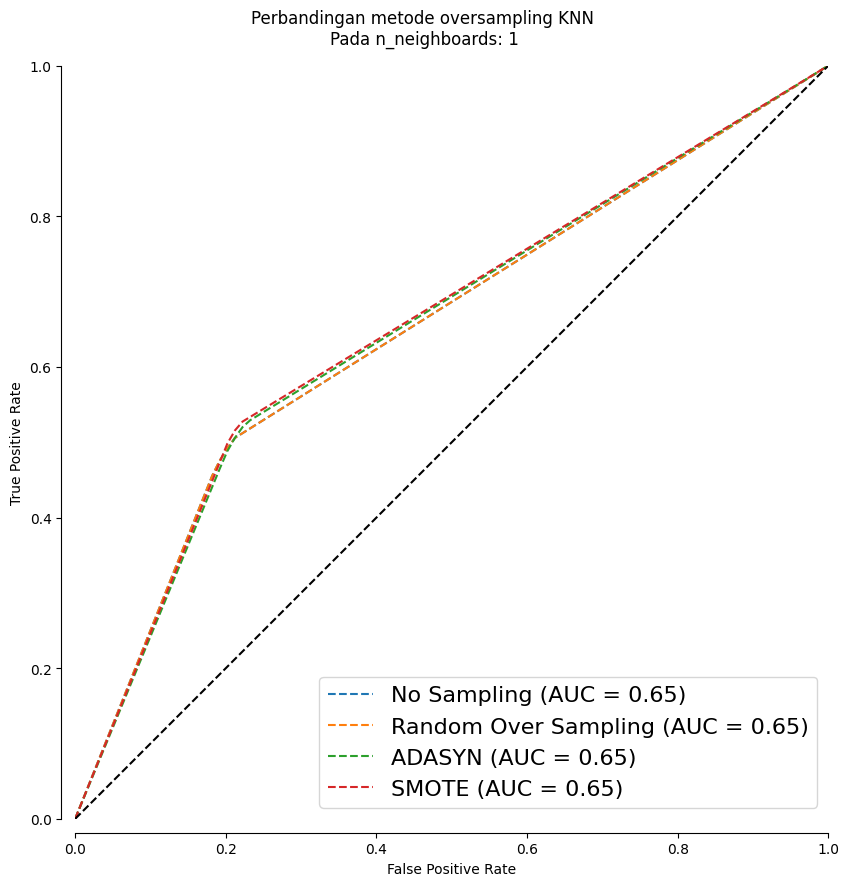

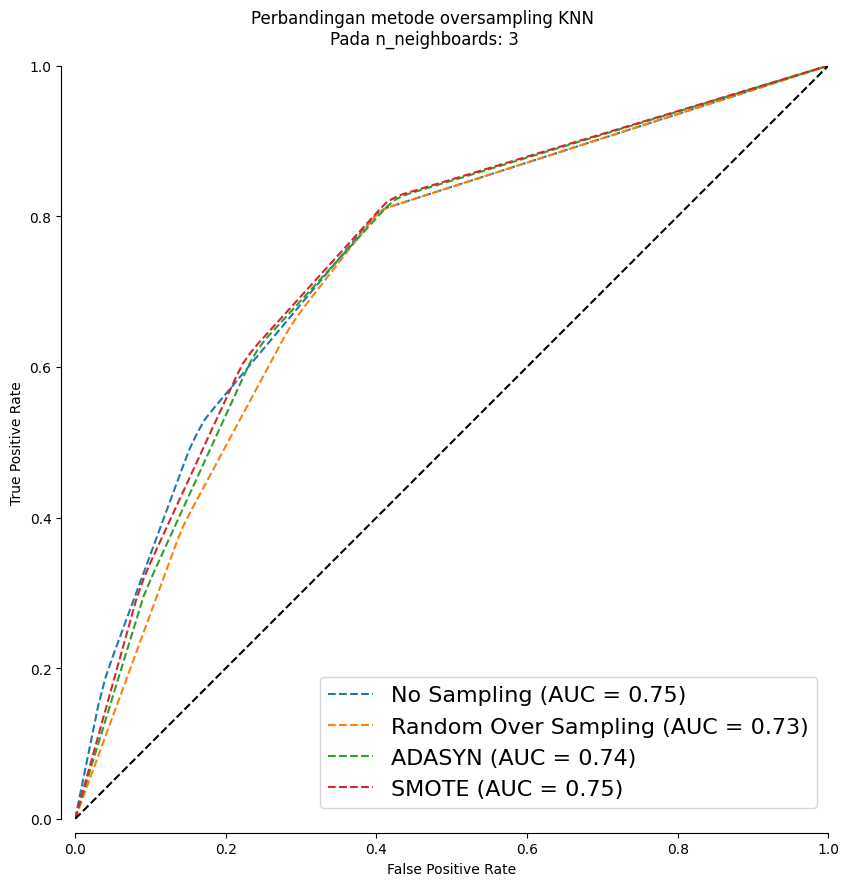

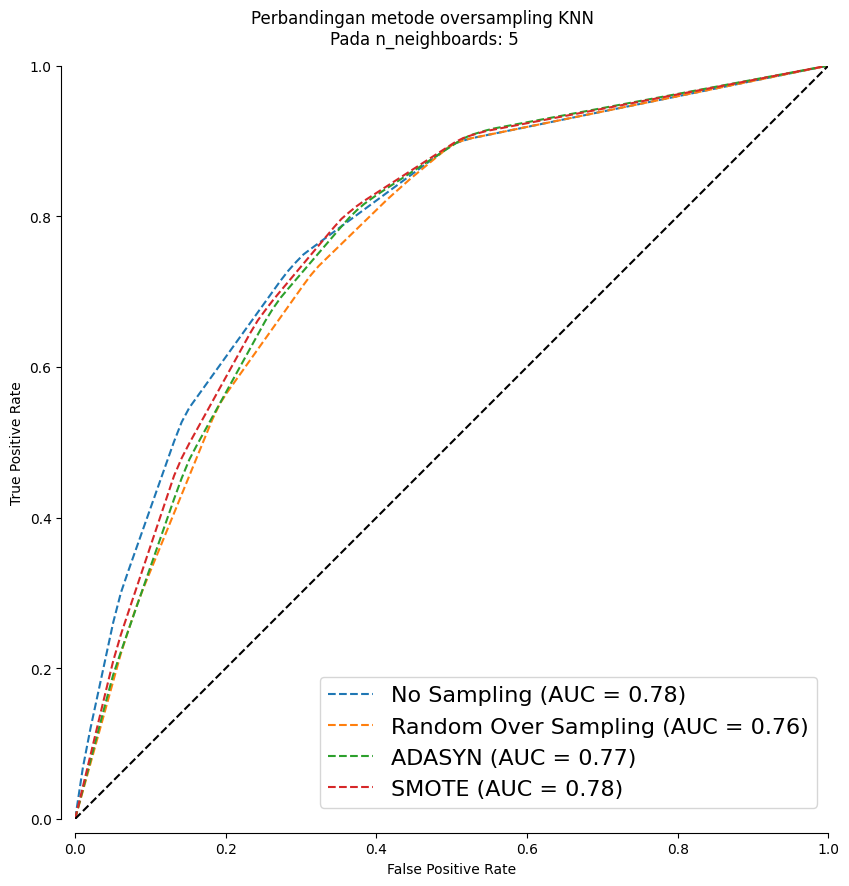

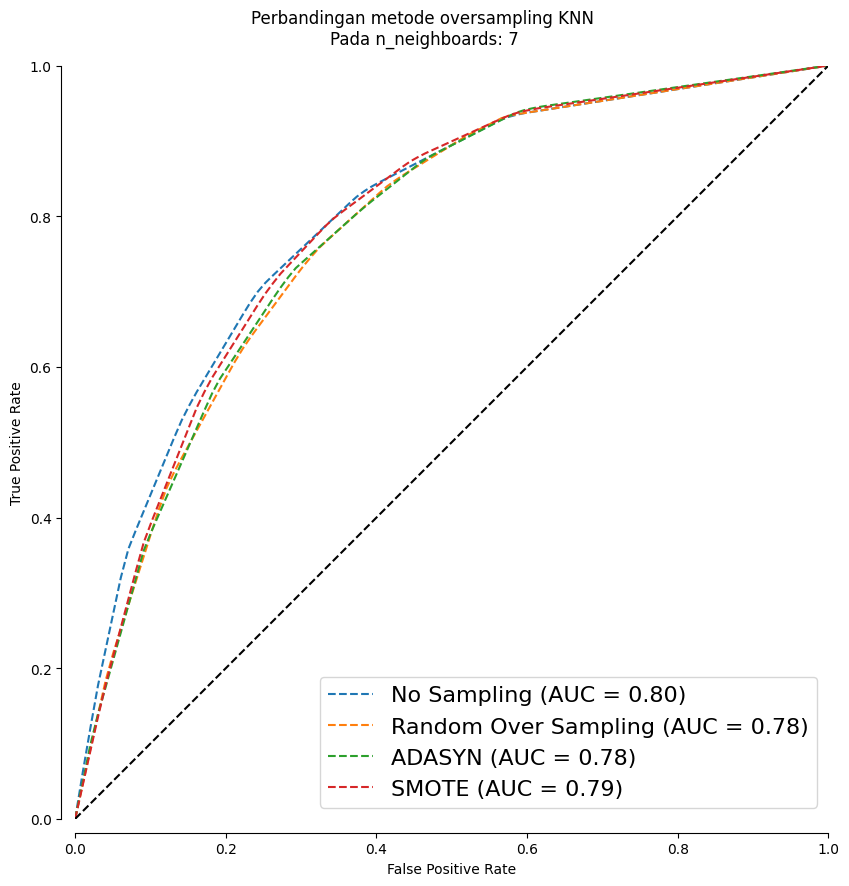

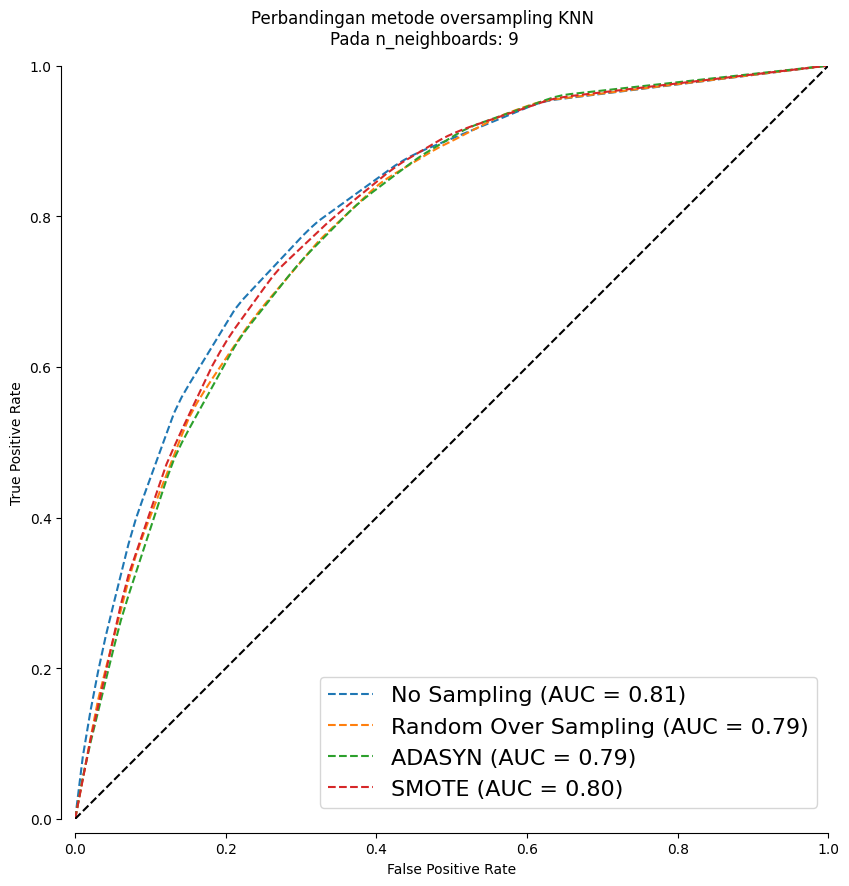

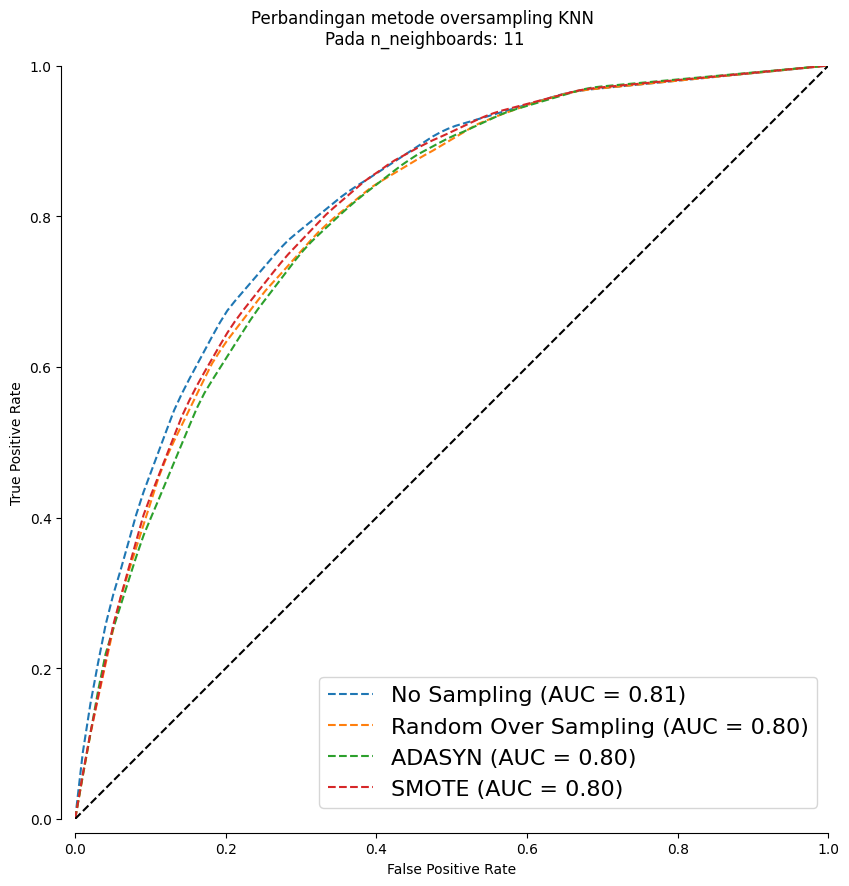

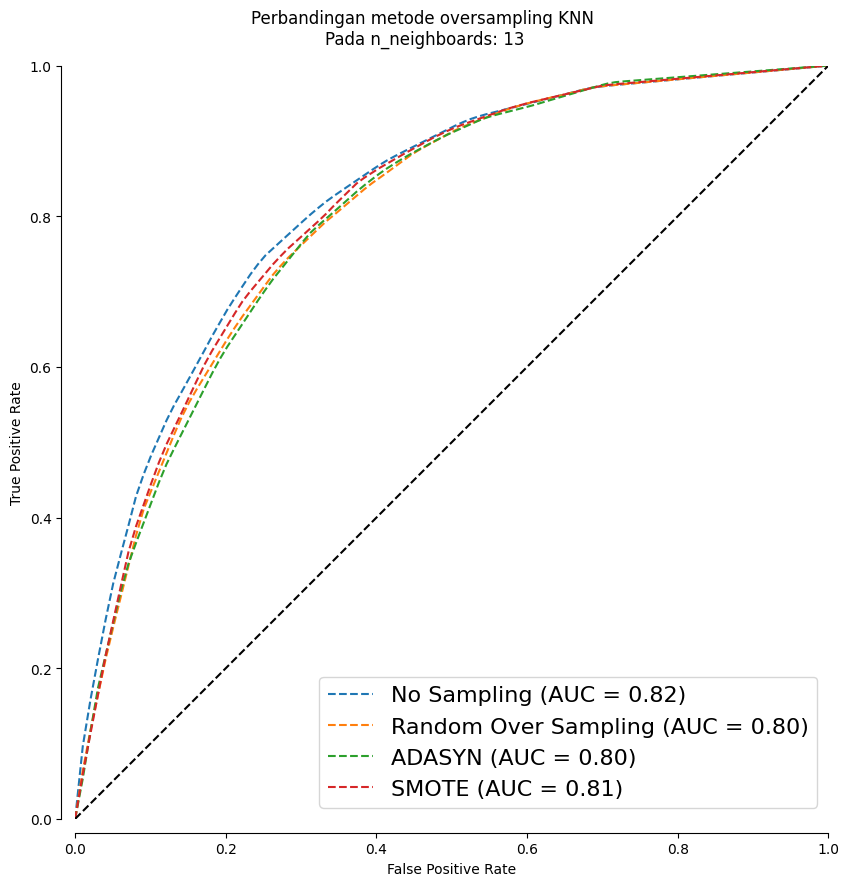

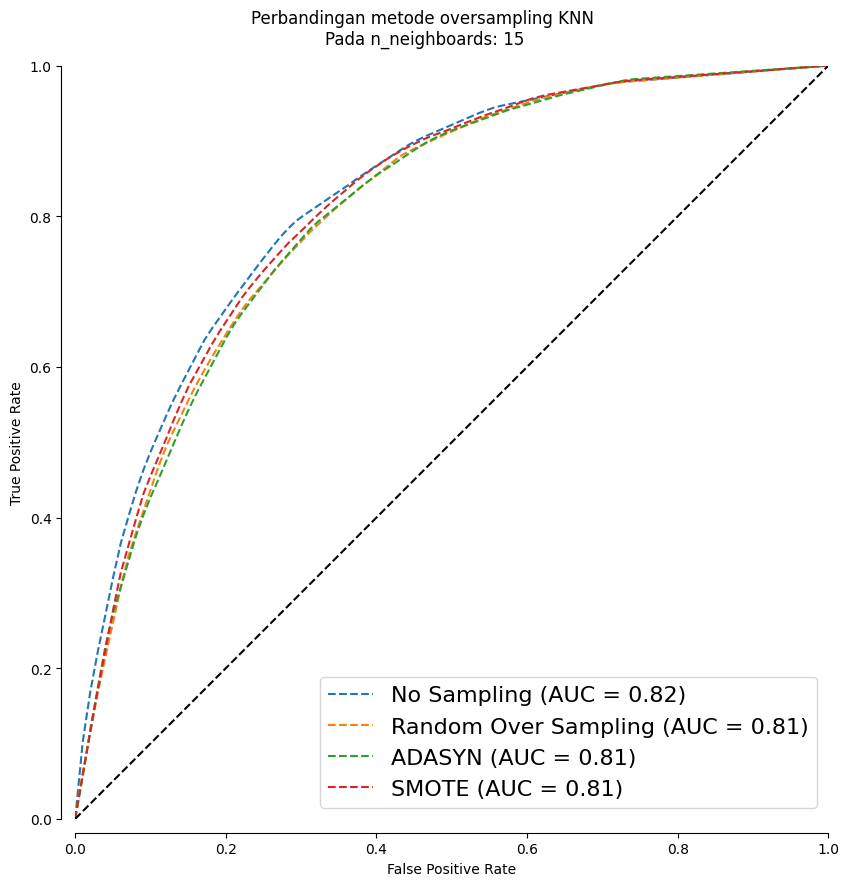

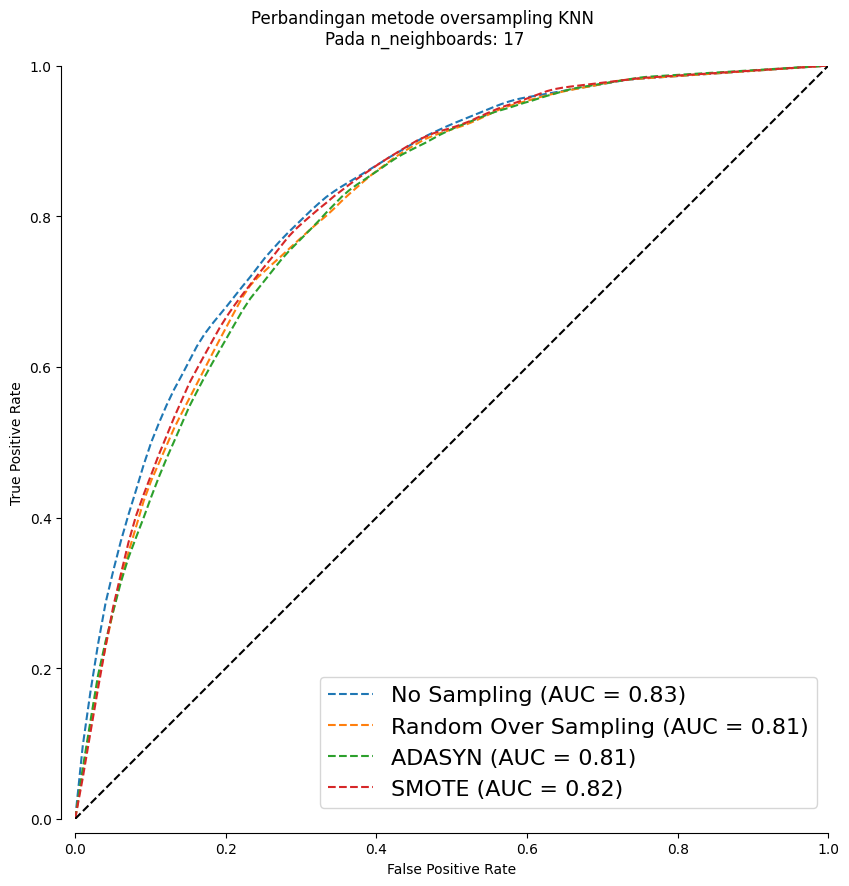

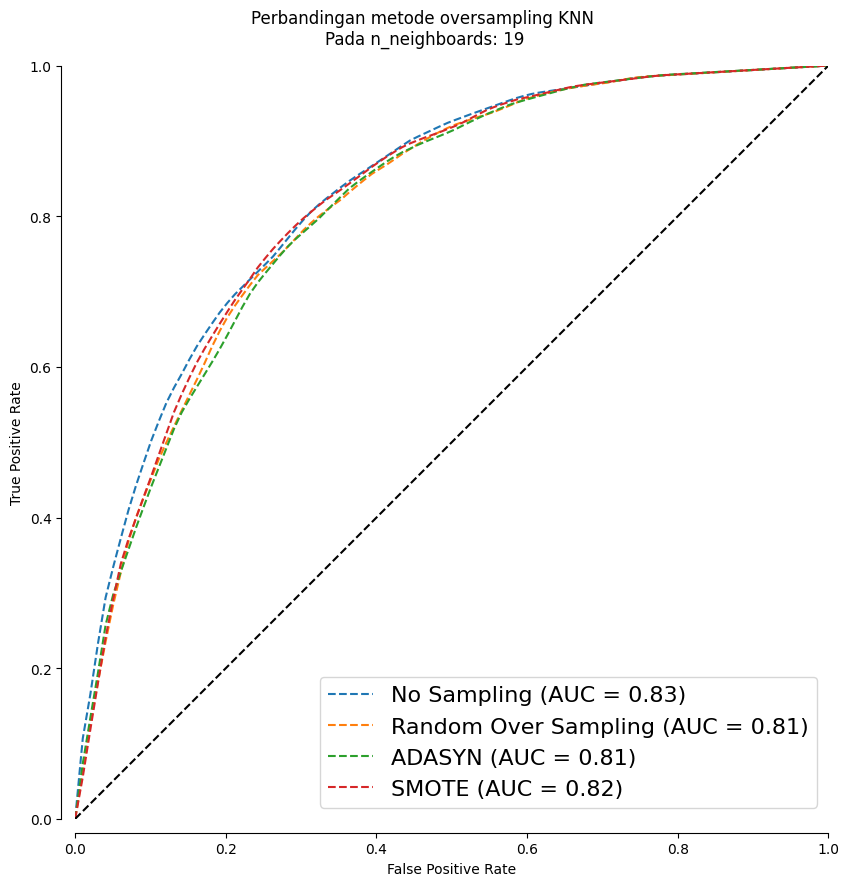

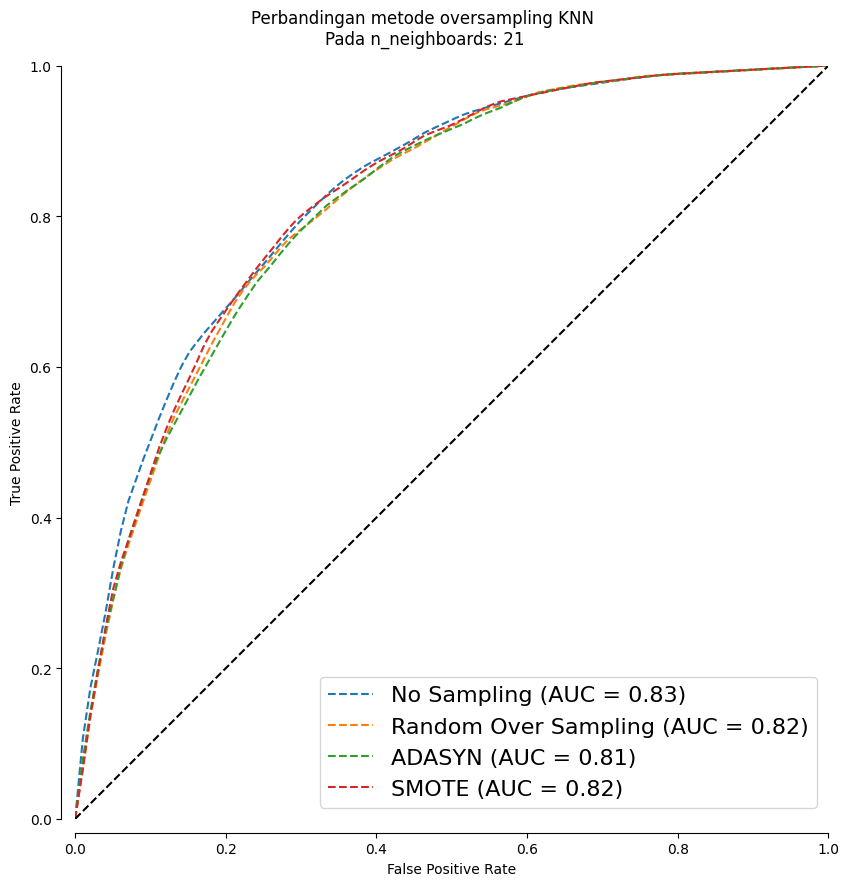

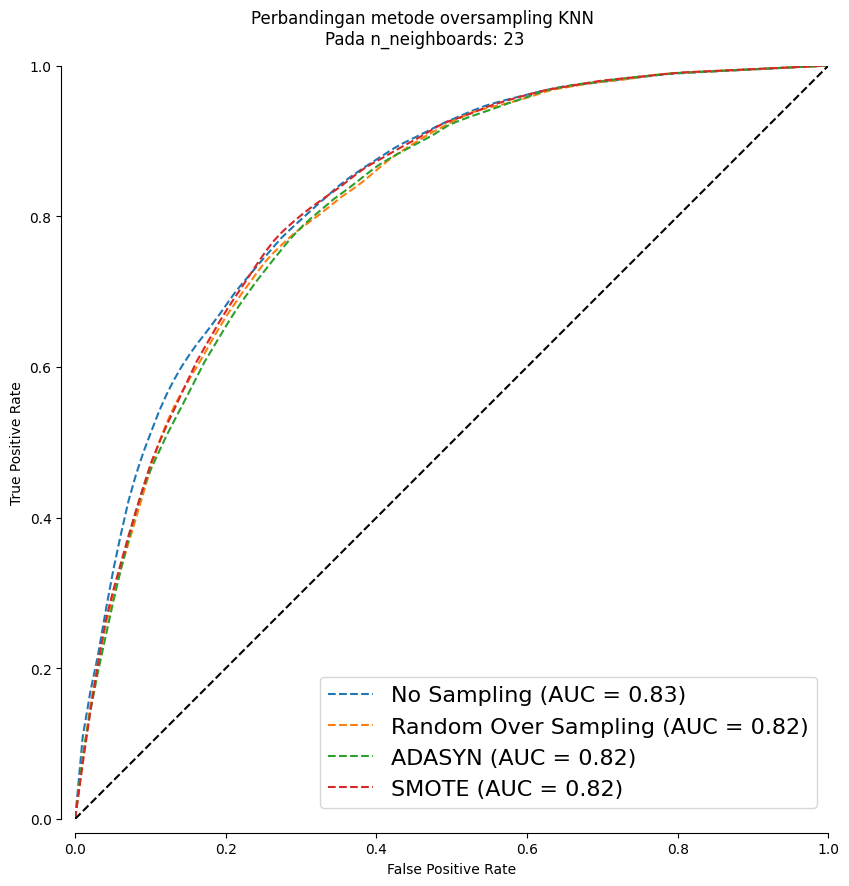

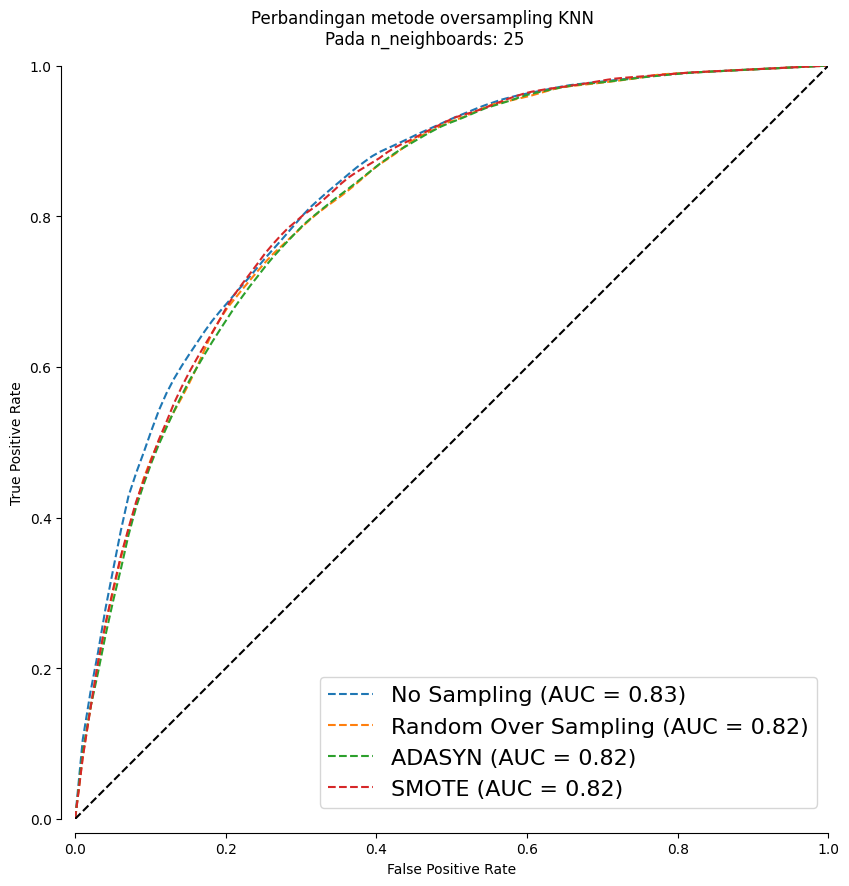

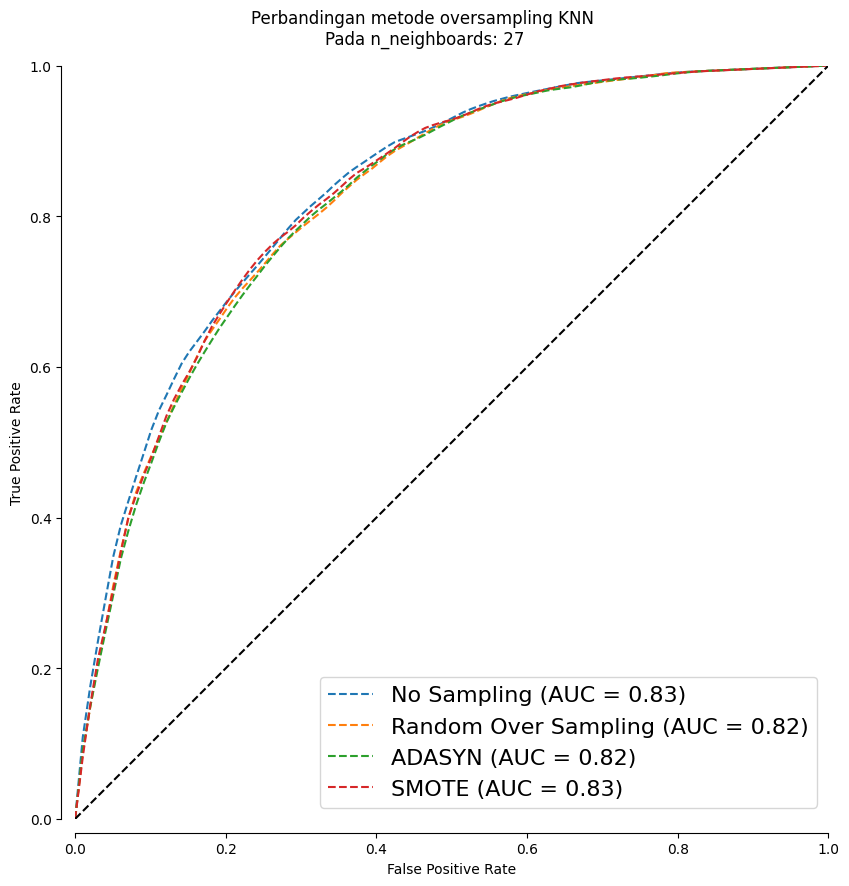

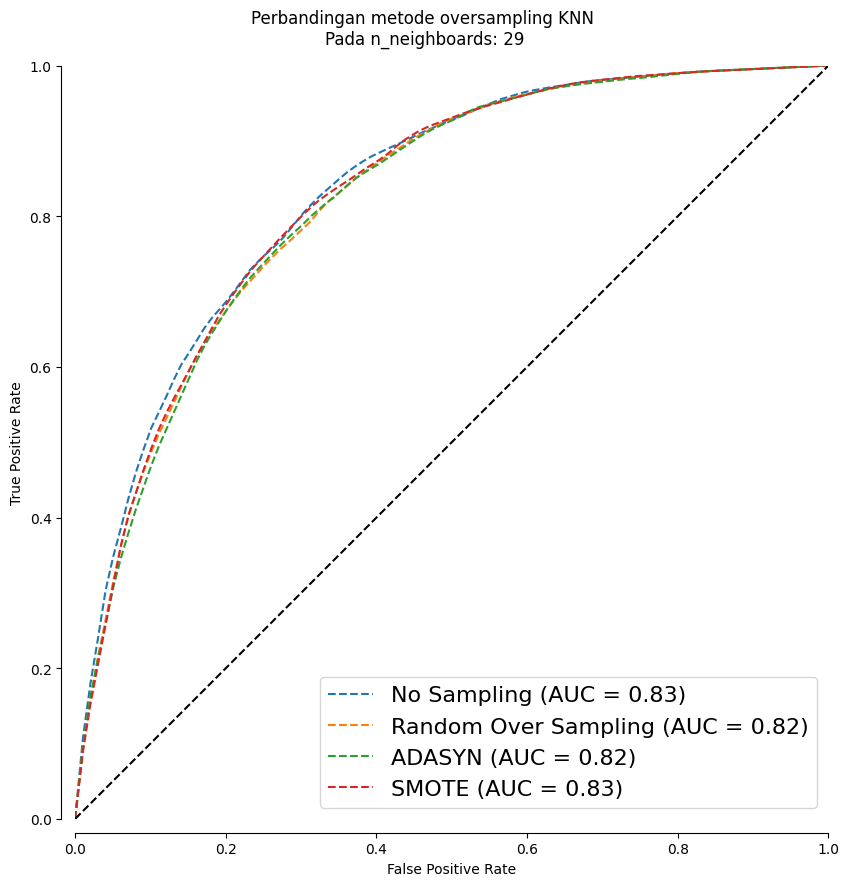

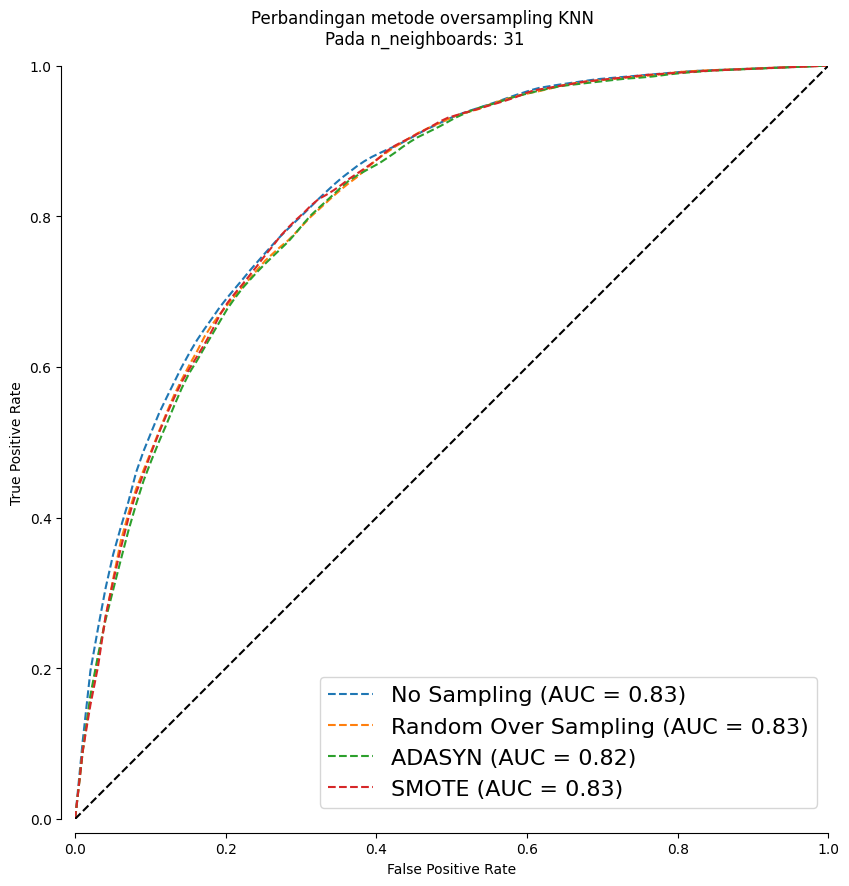

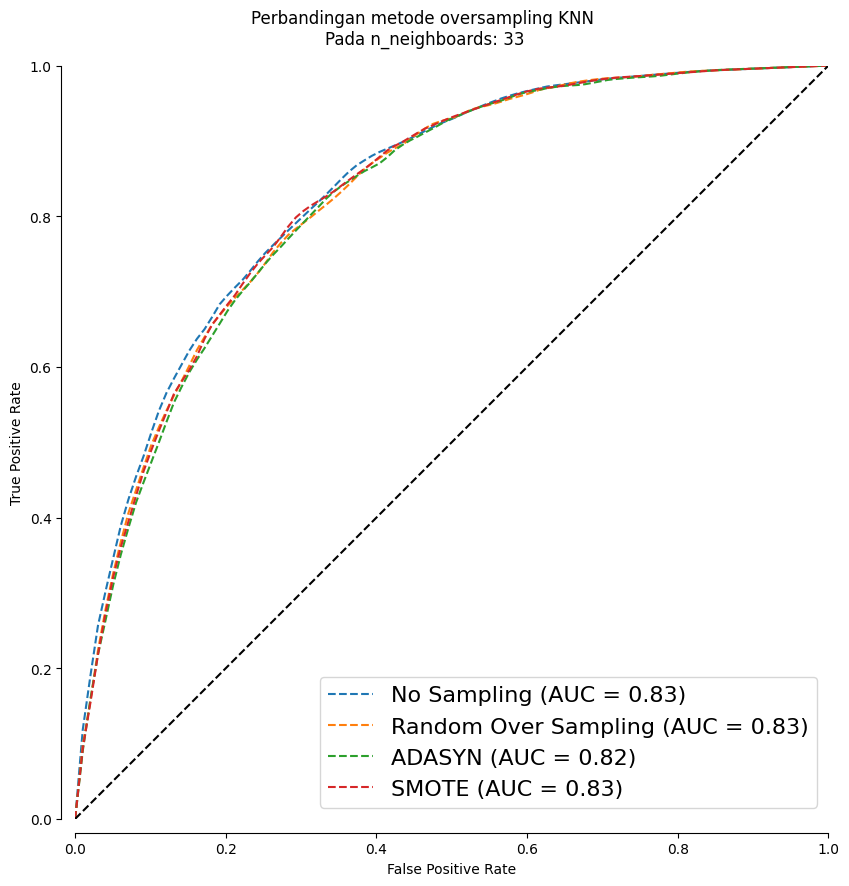

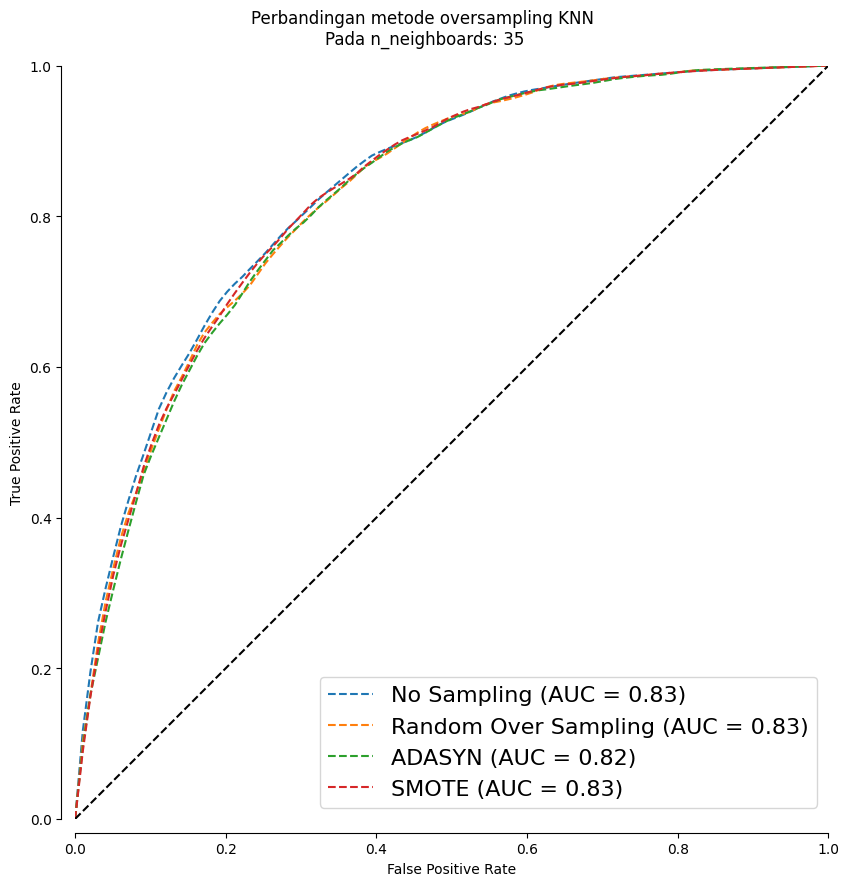

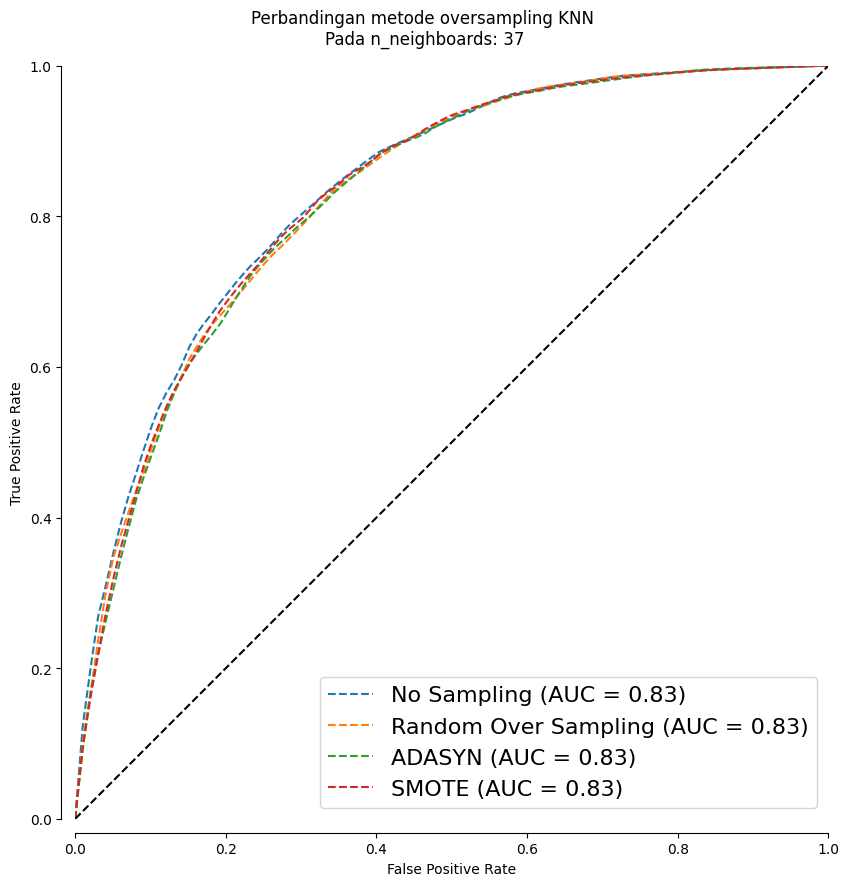

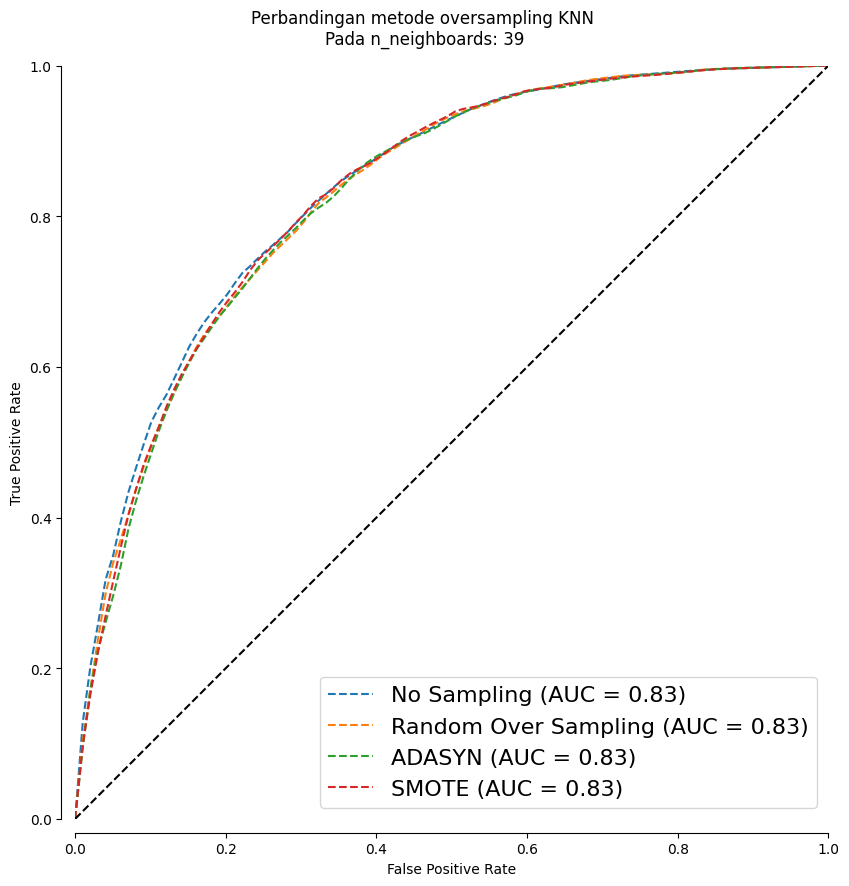

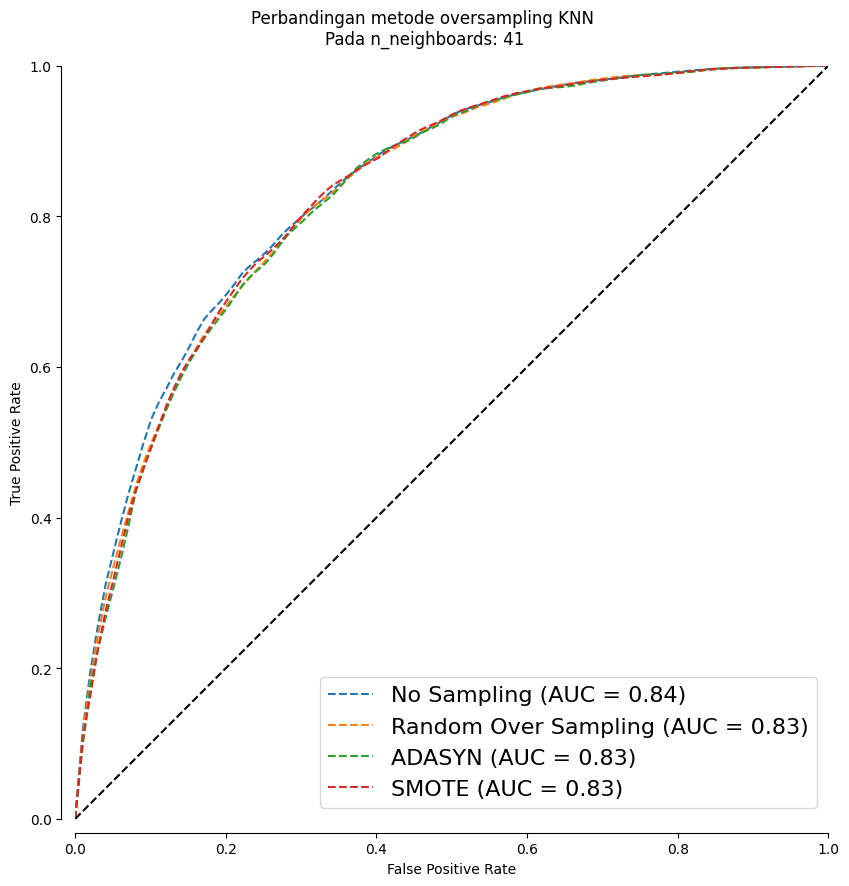

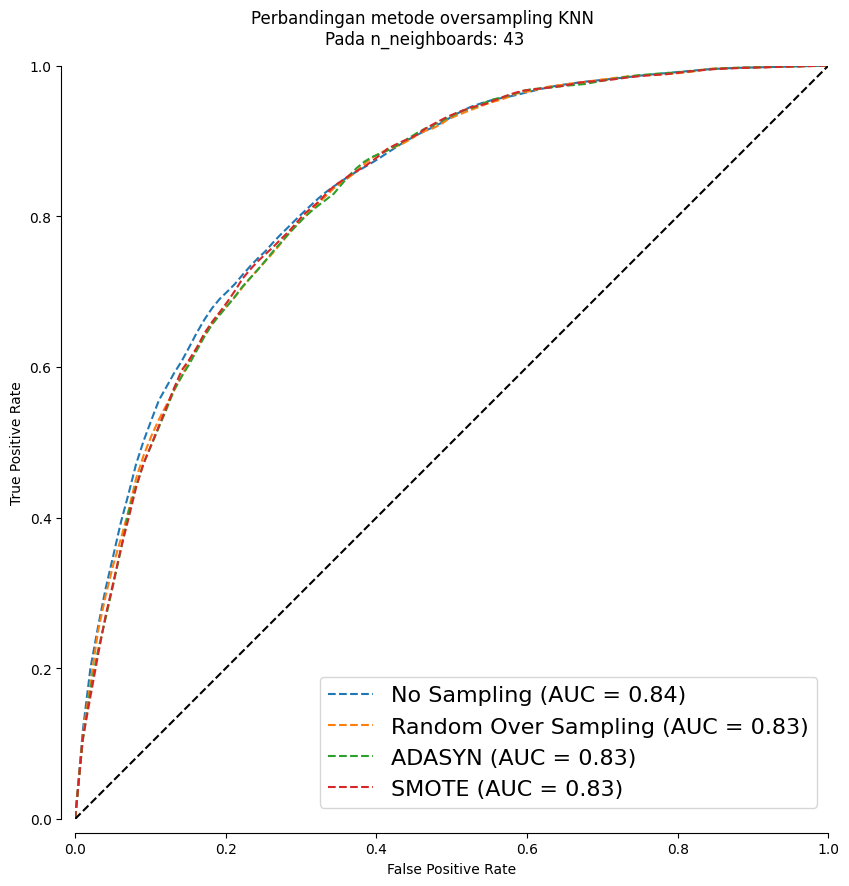

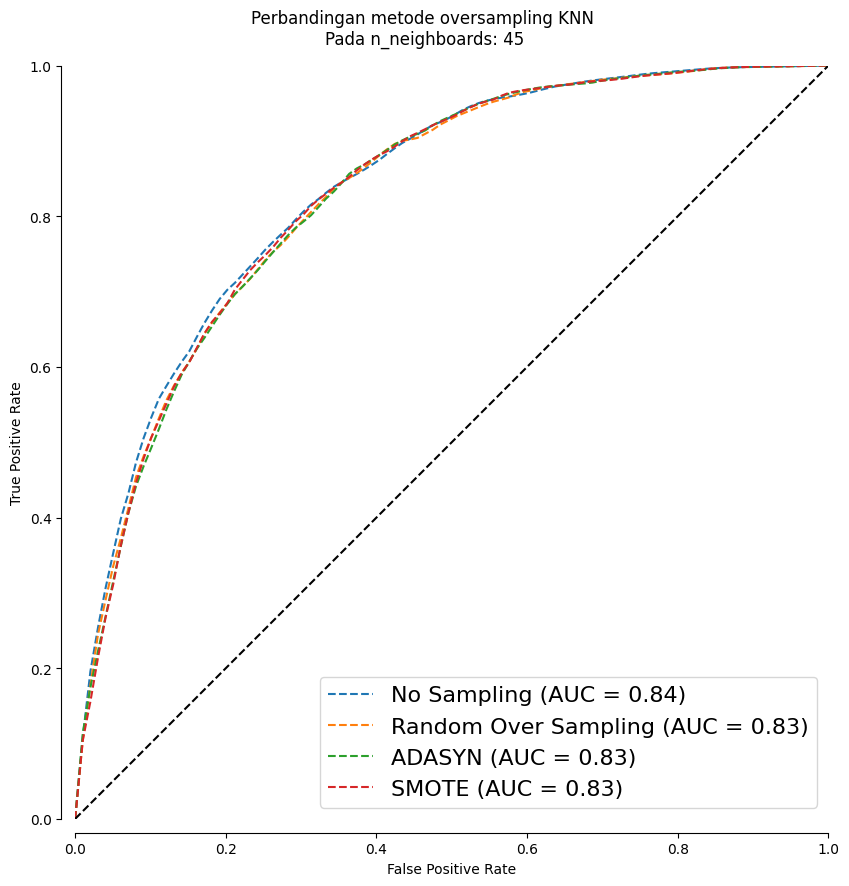

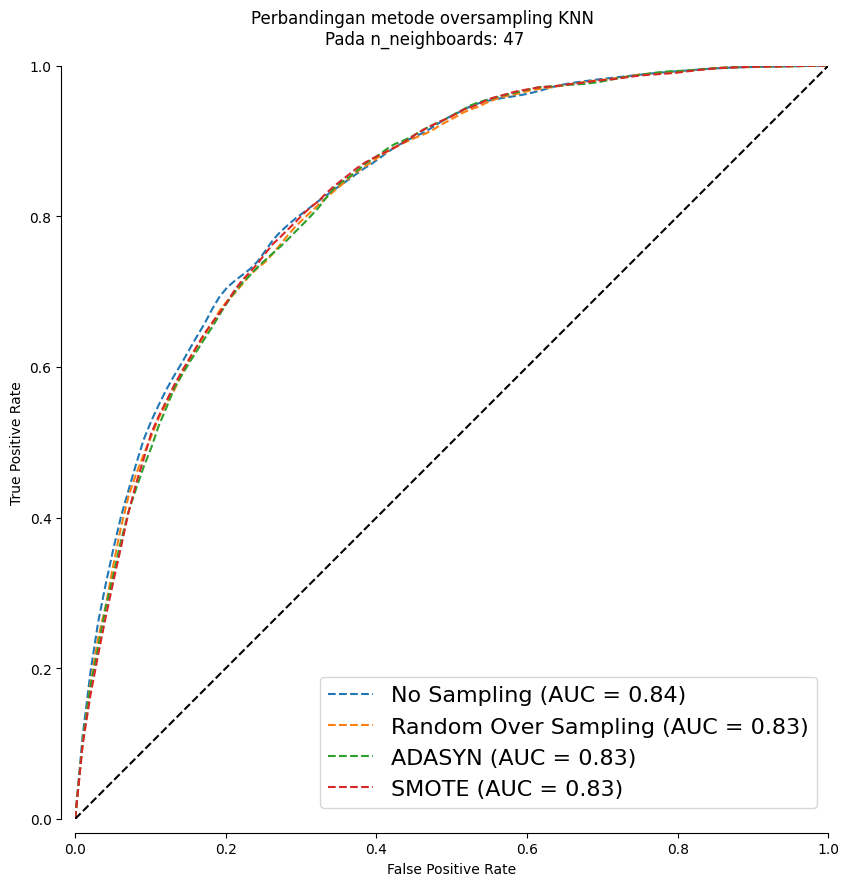

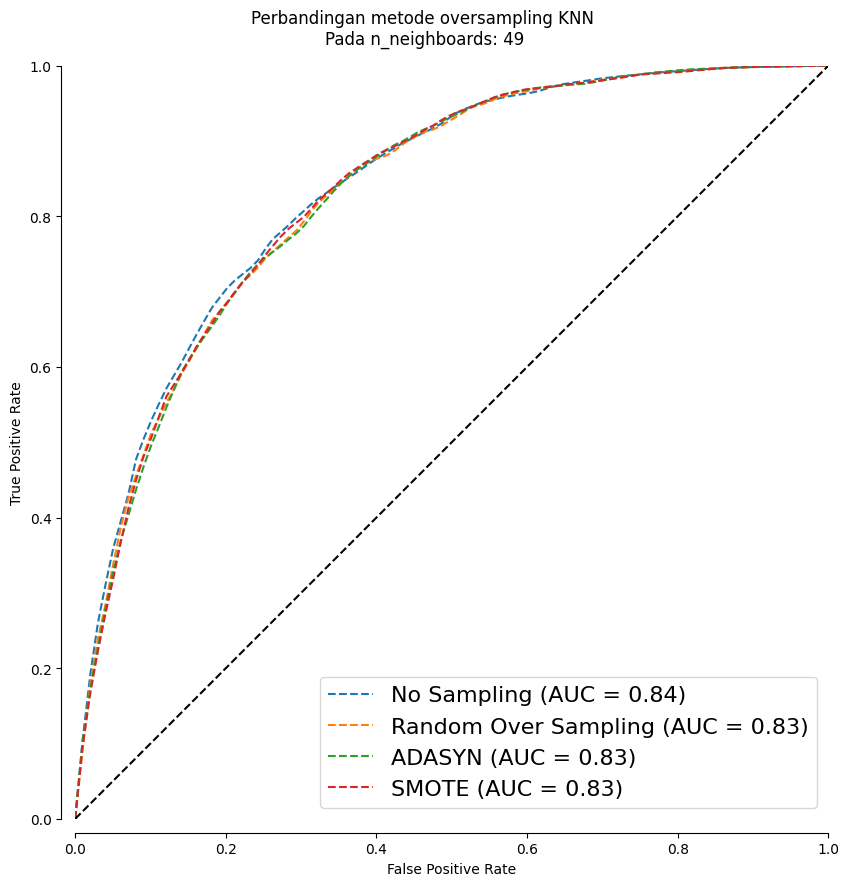

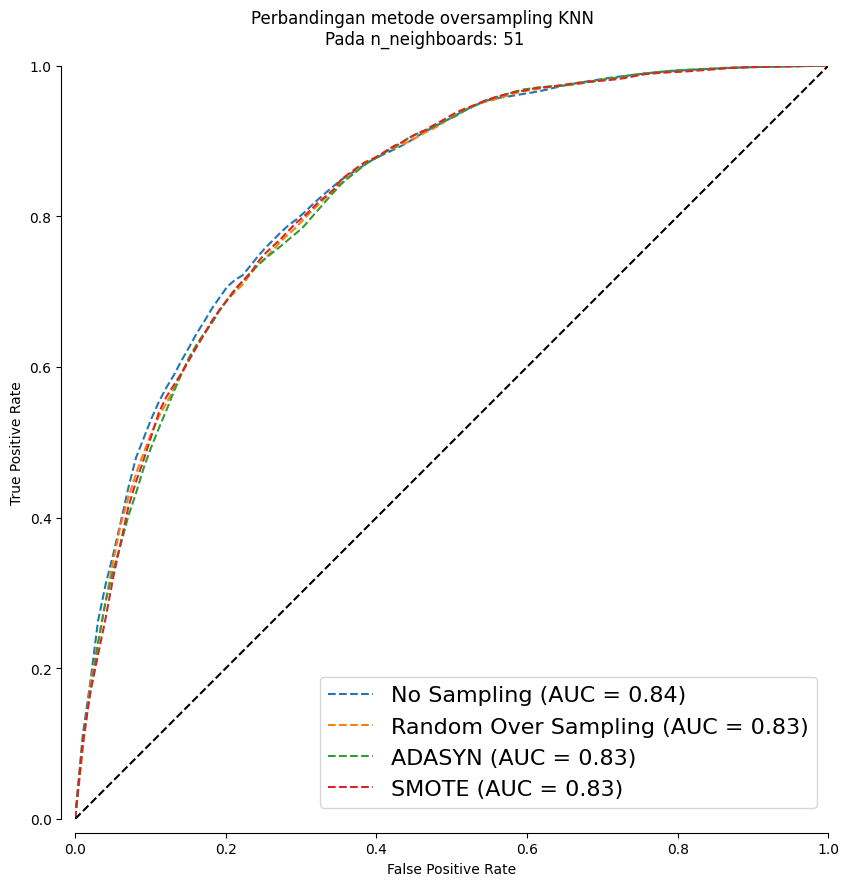

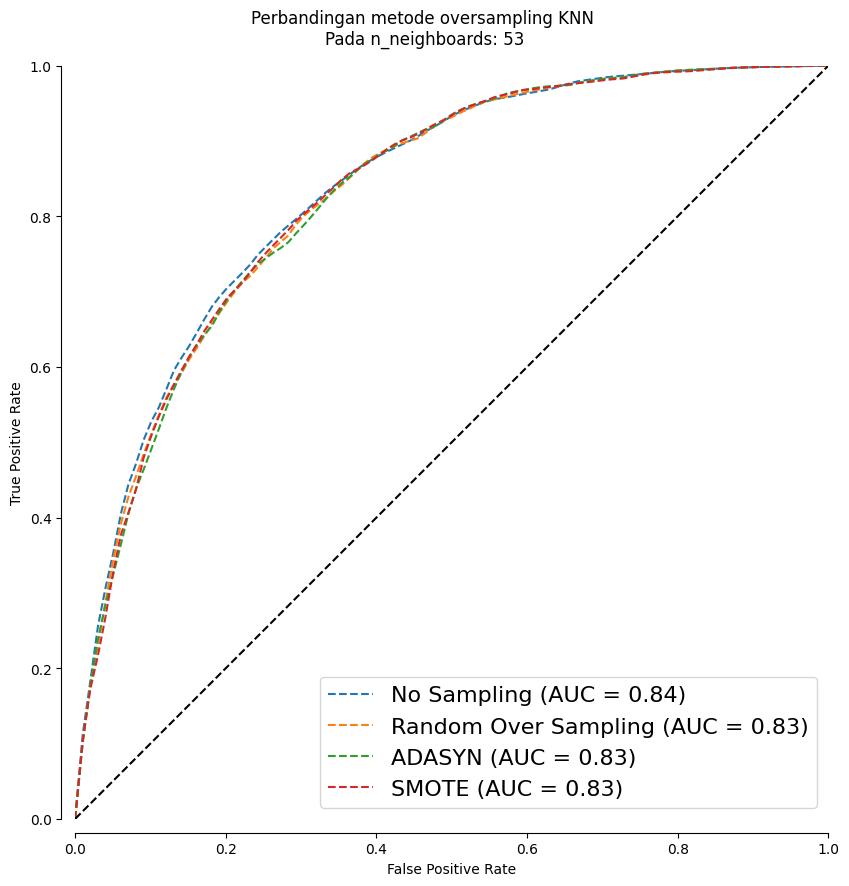

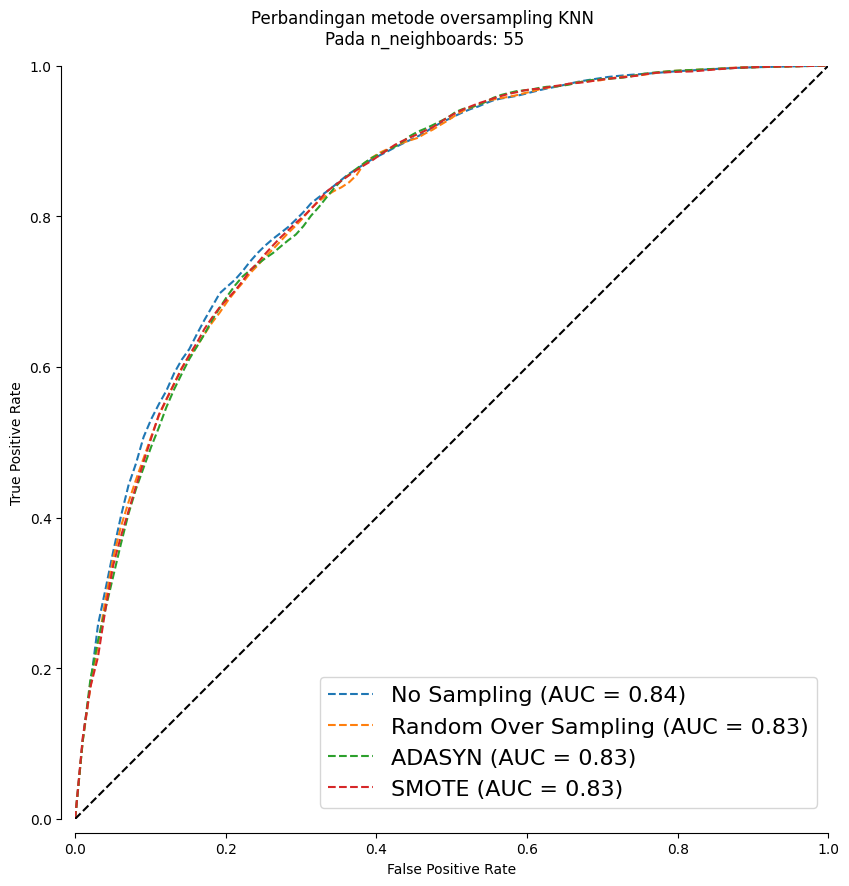

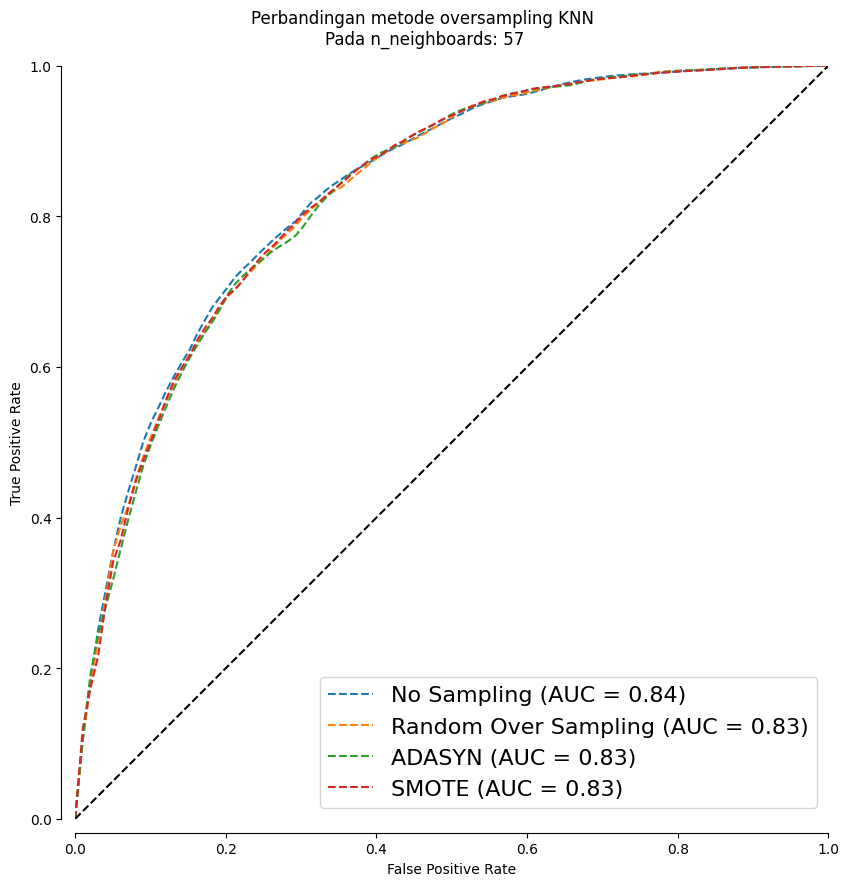

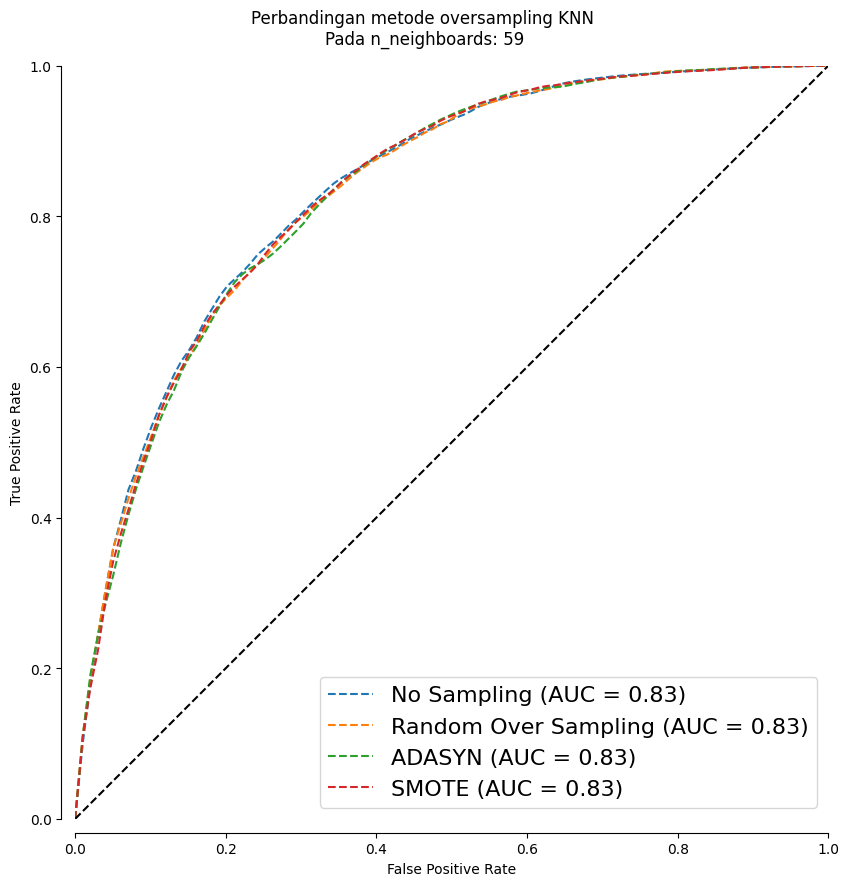

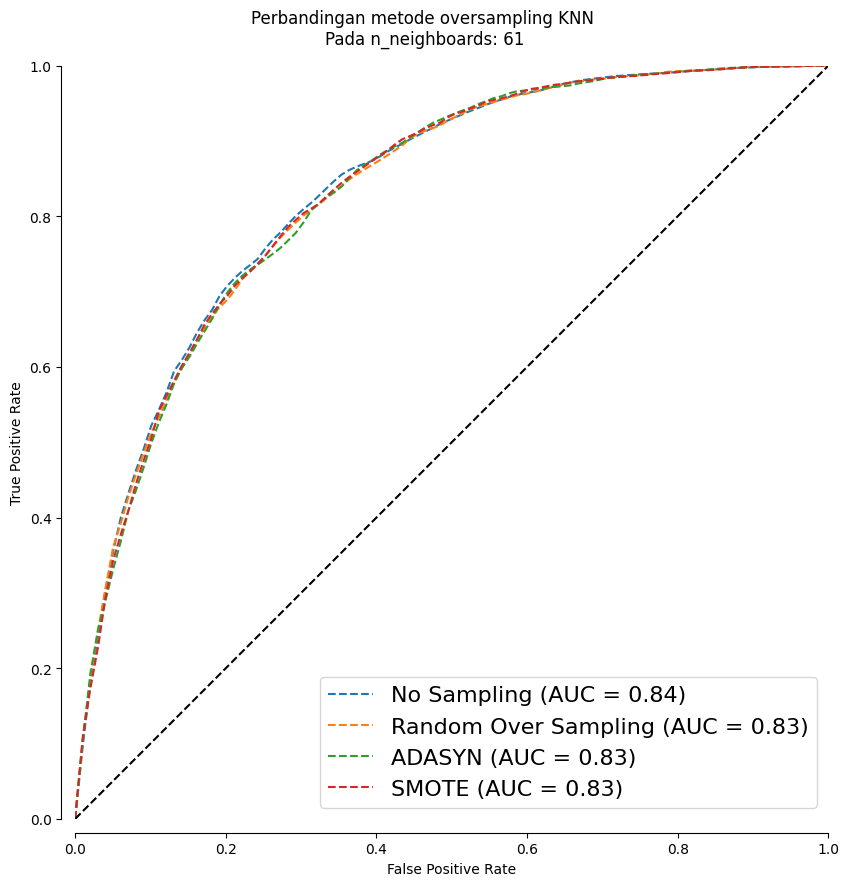

In [27]:
n_values = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61]
for i in n_values:
  classifier = KNeighborsClassifier(n_neighbors=i)
  cv = StratifiedKFold(n_splits=5)

  pos_label = 1

  pipelines = [
      ('No Sampling', make_pipeline(FunctionSampler(), classifier)),
      ('Random Over Sampling', make_pipeline(RandomOverSampler(random_state=42), classifier)),
      ('ADASYN', make_pipeline(ADASYN(random_state=42), classifier)),
      ('SMOTE', make_pipeline(SMOTE(random_state=42), classifier)),
  ]

  disp = []
  for name, model in pipelines:
      mean_tpr, mean_fpr = 0.0, np.linspace(0, 1, 100)
      for train_index, test_index in cv.split(X, y):
          X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
          y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

          model.fit(X_train_cv, y_train_cv)
          y_proba = model.predict_proba(X_test_cv)

          pos_label_idx = np.flatnonzero(model.classes_ == pos_label)[0]
          fpr, tpr, _ = roc_curve(y_test_cv, y_proba[:, pos_label_idx], pos_label=pos_label)
          mean_tpr += np.interp(mean_fpr, fpr, tpr)
          mean_tpr[0] = 0.0

      mean_tpr /= cv.get_n_splits(X, y)
      mean_tpr[-1] = 1.0
      mean_auc = auc(mean_fpr, mean_tpr)

      disp.append(
          RocCurveDisplay(
              fpr=mean_fpr,
              tpr=mean_tpr,
              roc_auc=mean_auc,
              estimator_name=name,
          )
      )

  fig, ax = plt.subplots(figsize=(9, 9))
  for d in disp:
      d.plot(ax=ax, linestyle="--")
  ax.plot([0, 1], [0, 1], linestyle="--", color="k")
  ax.axis("square")
  fig.suptitle(f"Perbandingan metode oversampling KNN \nPada n_neighboards: {i}")
  ax.set_xlim([0, 1])
  ax.set_ylim([0, 1])
  sns.despine(offset=10, ax=ax)
  plt.legend(loc="lower right", fontsize=16)
  plt.tight_layout()
  plt.show()

Kode di atas adalah benchmark(tolak ukur) untuk metode over-sampling, Tujuan dari tolok ukur ini adalah untuk mengevaluasi apakah penerapan metode over-sampling (seperti Random Over Sampling, ADASYN, dan SMOTE) meningkatkan performa model KNN dibandingkan dengan tidak melakukan penanganan ketidakseimbangan data sama sekali.

dari hasil di atas..kita dapat menarik kesimpulan bahwa Semua metode over-sampling (Random Over Sampling, ADASYN, SMOTE) memberikan performa yang sangat mirip dengan No Sampling, dengan AUC yang sedikit lebih rendah atau sama.

dengan kata lain, pada dataset ini nampaknya tidak diperlukan adalah handling imbalance dataset(dalam kasus ini over-sampling), dikarenakan nilai yang 11/12, bahkan kebanyakn menunjjukan nilai AUC yang lebih tinggi ketika tidak dilakukan over-sampling

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
accuracy

0.7559241706161137

In [ ]:
conf_matrix

array([[1308,  241],
       [ 274,  287]])

1308: True Negative (TN) - Jumlah sampel dari kelas 0 yang diklasifikasikan dengan benar sebagai kelas 0.

241: False Positive (FP) - Jumlah sampel dari kelas 0 yang diklasifikasikan salah sebagai kelas 1.

274: False Negative (FN) - Jumlah sampel dari kelas 1 yang diklasifikasikan salah sebagai kelas 0.

287: True Positive (TP) - Jumlah sampel dari kelas 1 yang diklasifikasikan dengan benar sebagai kelas 1.

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1549
           1       0.54      0.51      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.68      2110
weighted avg       0.75      0.76      0.75      2110



Model memiliki akurasi 76%, yang berarti 76% dari semua prediksi adalah benar

In [ ]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

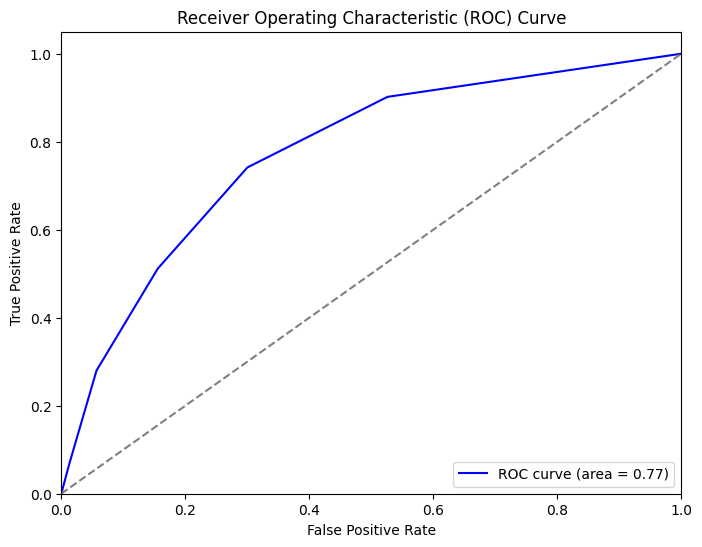

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Dapat dilihat pada ROC curve, bahwasannya nilai dari area under the curve (AUC) memiliki skor 0.77.

seperti yang kita tau bahwasannya nilai AUC memiliki rentang 0-1 dimana semakin mendekati 1 semakin baik,0 berarti model tidak bisa memprediksi apapun, 0.5 berarti model sekedar tebak-tebakan acak dan 1 artinya sempurna..

sedangkan nilai kita di sini adalah 0.77, ini menunjukkan bahwa model lebih baik daripada tebak-tebakan acak dan memiliki kinerja yang layak, tetapi masih ada ruang untuk perbaikan.

# Learning curve

mari kita berasumsi bahwasaannya parameter yang akan kita tunning hanyalah n_neighboards, sisannya pada metric dan weight akan kita seting default (metric defaultnya minkowski sedangkan weight defaultnya uniform)

kita akan melihat learning curvenya

>1, train: 0.999, test: 0.731
Rentang adalah = 0.268
>2, train: 0.869, test: 0.752
Rentang adalah = 0.117
>3, train: 0.861, test: 0.754
Rentang adalah = 0.108
>4, train: 0.845, test: 0.766
Rentang adalah = 0.079
>5, train: 0.836, test: 0.756
Rentang adalah = 0.080
>6, train: 0.834, test: 0.766
Rentang adalah = 0.069
>7, train: 0.826, test: 0.757
Rentang adalah = 0.069
>8, train: 0.830, test: 0.768
Rentang adalah = 0.063
>9, train: 0.825, test: 0.769
Rentang adalah = 0.056
>10, train: 0.823, test: 0.775
Rentang adalah = 0.048
>11, train: 0.820, test: 0.770
Rentang adalah = 0.050
>12, train: 0.820, test: 0.778
Rentang adalah = 0.042
>13, train: 0.817, test: 0.780
Rentang adalah = 0.037
>14, train: 0.820, test: 0.789
Rentang adalah = 0.031
>15, train: 0.815, test: 0.785
Rentang adalah = 0.030
>16, train: 0.816, test: 0.786
Rentang adalah = 0.030
>17, train: 0.813, test: 0.783
Rentang adalah = 0.030
>18, train: 0.815, test: 0.791
Rentang adalah = 0.024
>19, train: 0.812, test: 0.788
Rentan

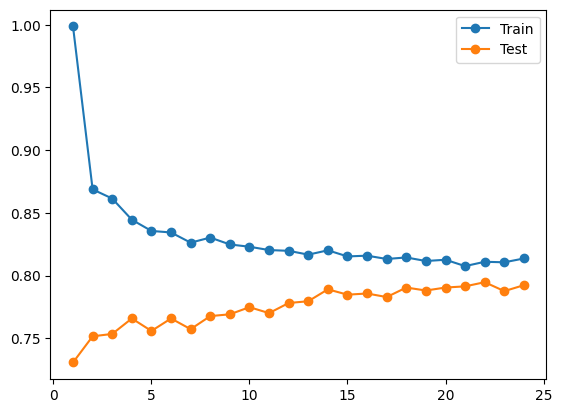

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 25)]
for i in values:
 model = KNeighborsClassifier(n_neighbors=i,weights="uniform", metric="minkowski")
 model.fit(X_train, y_train)
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 print(">%d, train: %.3f, test: %.3f" % (i, train_acc, test_acc))
 rentang = train_acc - test_acc
 print(f"Rentang adalah = {rentang:.3f}")

plt.plot(values, train_scores, "-o", label="Train")
plt.plot(values, test_scores, "-o", label="Test")
plt.legend()
plt.show()

dengan asumsi sebelumnya, berikut informasi yang bisa didapat

- Ketika nilai n_neighbors meningkat dari 1 ke 10, kita melihat penurunan dalam rentang akurasi antara pelatihan dan pengujian, yang menunjukkan model menjadi lebih generalisasi, Akurasi pengujian meningkat secara bertahap hingga mencapai sekitar 0.775 pada n_neighbors = 10.

- Setelah nilai n_neighbors mencapai sekitar 10, akurasi pengujian cenderung stabil dengan nilai berkisar sekitar 0.775 hingga 0.795. Akurasi pelatihan dan pengujian menunjukkan tren konvergen, dengan rentang akurasi yang semakin kecil, menunjukkan bahwa model tidak lagi overfit atau underfit secara signifikan.

- Untuk nilai n_neighbors yang lebih tinggi (20-24), rentang akurasi antara pelatihan dan pengujian sangat kecil (sekitar 0.016 hingga 0.023), menunjukkan bahwa model memiliki performa yang stabil dan seimbang antara pelatihan dan pengujian.

**sehingga kita dapat mentimpulkan**

- Untuk model KNN ini, memilih nilai n_neighbors sekitar 10 hingga 22 akan memberikan keseimbangan terbaik antara akurasi dan generalisasi.

# Tunning

n_neighbors = 11


Accuracy: 0.7701421800947867


Confusion Matrix:
[[1317  232]
 [ 253  308]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1549
           1       0.57      0.55      0.56       561

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110





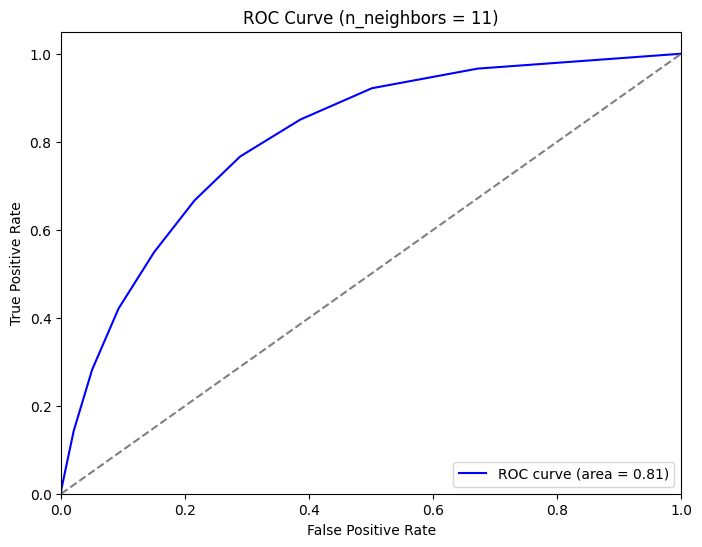

n_neighbors = 13


Accuracy: 0.7796208530805687


Confusion Matrix:
[[1323  226]
 [ 239  322]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1549
           1       0.59      0.57      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110





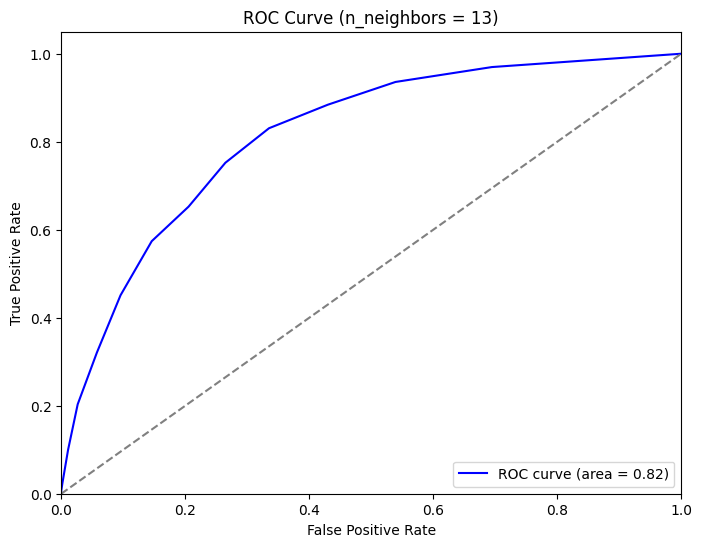

n_neighbors = 15


Accuracy: 0.7848341232227488


Confusion Matrix:
[[1332  217]
 [ 237  324]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110





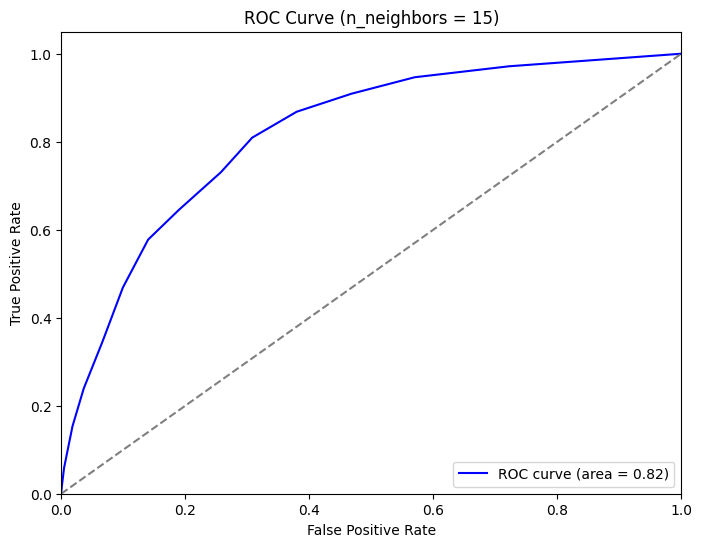

n_neighbors = 17


Accuracy: 0.7829383886255924


Confusion Matrix:
[[1336  213]
 [ 245  316]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1549
           1       0.60      0.56      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110





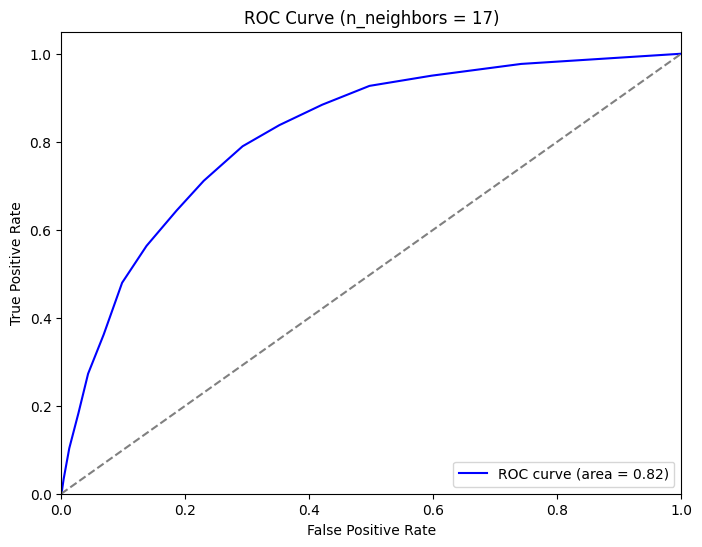

n_neighbors = 19


Accuracy: 0.7881516587677725


Confusion Matrix:
[[1340  209]
 [ 238  323]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1549
           1       0.61      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.79      2110





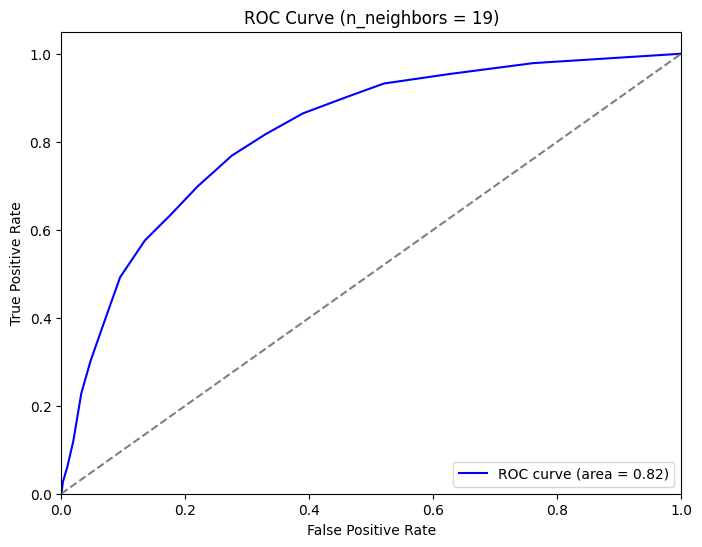

n_neighbors = 21


Accuracy: 0.7914691943127962


Confusion Matrix:
[[1346  203]
 [ 237  324]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1549
           1       0.61      0.58      0.60       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110





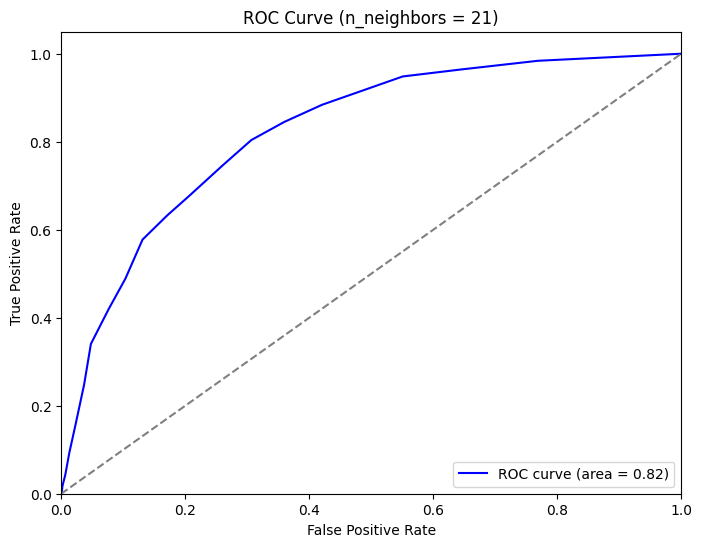

n_neighbors = 23


Accuracy: 0.7876777251184834


Confusion Matrix:
[[1336  213]
 [ 235  326]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110





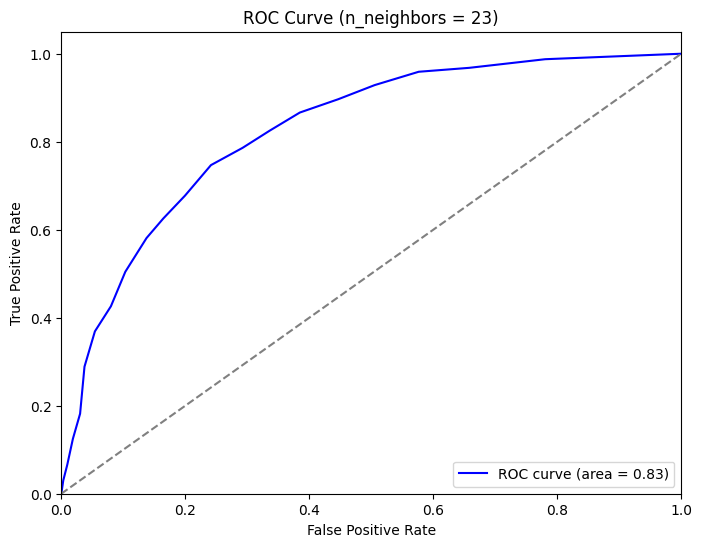

n_neighbors = 25


Accuracy: 0.7876777251184834


Confusion Matrix:
[[1341  208]
 [ 240  321]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1549
           1       0.61      0.57      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.79      2110





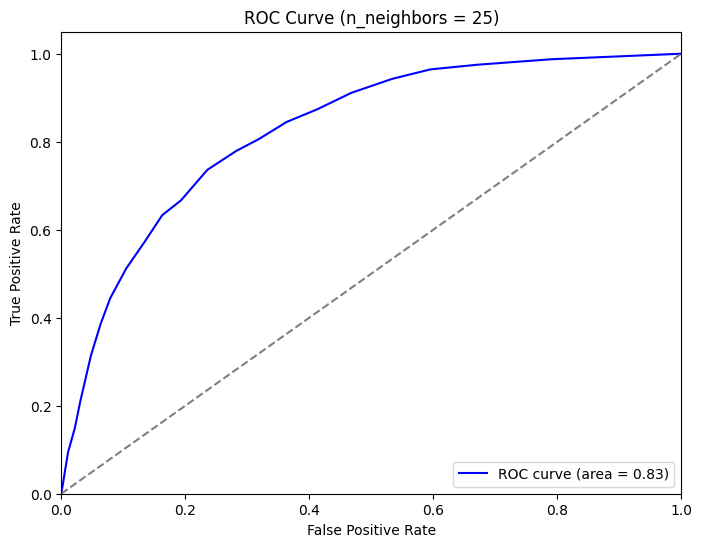

In [ ]:
n_values = [11, 13, 15, 17, 19, 21, 23, 25]
for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("=====================================")
    print(f"n_neighbors = {n}")
    print("\n")
    print(f"Accuracy: {accuracy}")
    print("\n")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("\n")
    print(f"Classification Report:\n{class_report}")
    print("\n")

    y_pred_prob = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (n_neighbors = {n})")
    plt.legend(loc="lower right")
    plt.show()

Kurva ROC paling mulus didapat dari n = 17 sehingga kita bisa anggap sebagai yang paling tidak berpotensi overffiting, untuk skor akurasinnya juga lumayan tinggi dengan nilai +-78

selain itu, nilai dari AUC menunjjukan 0.82, ini lebih baik daripaka ketika n = 5 dimana nilai dari AUC hanyalan 0.77

jadi kita bisa anggap baseline model KNN sementara ini punya model terbaik dengan n = 17 dengan skor akurasi +-78% benar.

tapi kita perlu terus mencari model terbaik laiinnya untuk membandingkannya

# Hyper parameter tunning dengan Bayesian Optimization

Accuracy: 0.7876777251184834
Confusion Matrix:
 [[1336  213]
 [ 235  326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



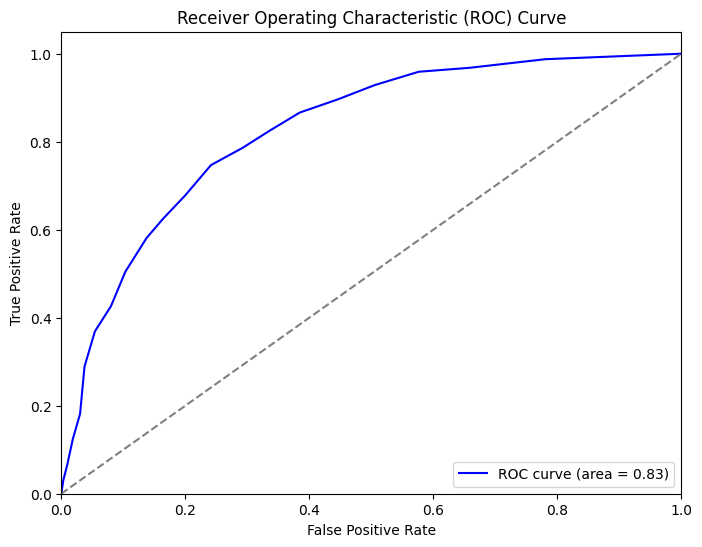

Best Parameters: OrderedDict([('metric', 'minkowski'), ('n_neighbors', 23), ('weights', 'uniform')])


In [ ]:
knn = KNeighborsClassifier()

param_space = {
    "n_neighbors": Categorical([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]),
    "weights": Categorical(["uniform", "distance"]),
    "metric": Categorical(["euclidean", "manhattan", "minkowski"])
}

bayes_search = BayesSearchCV(estimator=knn, search_spaces=param_space, n_iter=30, cv=5, n_jobs=-1, random_state=42)
bayes_search.fit(X_train, y_train)

best_knn = bayes_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("Best Parameters:", bayes_search.best_params_)

dengan menggunakan hyper parameter tunning Bayesian Optimization, kita mendapatkan model terbaik berada di parameter

- metric: minkowski (default untuk metric adalah minkowski)
- n_neighbors: 23
- weights: unifor (default untuk weight adalah uniform)..berikut adalah spesfikasinya

dengan parameter terbaik kita mendapatkan nilai akurasi sebesar +-0.79, ini lebih besar sekita 1% ketimbang ketika n = 5, metric = minkowski dan weight = uniform

selain itu untuk nilai AUC, adalah sama dengan ketika n = 21, metric = minkowski dan weight = uniform yaitu menunjukkan nilai 0.83

Selanjutnya mari kita periksa kinerja model pada data training dan testing sesuai dengan paramter ini

### Cek oferfitting model hyperparameter tunning bayesian optimaizen

Training Accuracy: 0.810646078829744
Training Confusion Matrix:
 [[3196  418]
 [ 514  794]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      3614
           1       0.66      0.61      0.63      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.75      0.75      4922
weighted avg       0.81      0.81      0.81      4922

Test Accuracy: 0.7876777251184834
Test Confusion Matrix:
 [[1336  213]
 [ 235  326]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



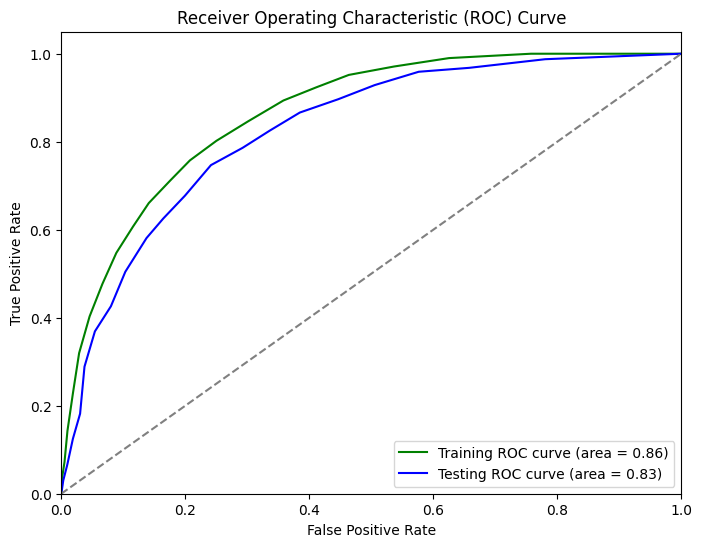

In [ ]:
knn = KNeighborsClassifier(n_neighbors=23, weights="uniform", metric="minkowski")
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

y_train_pred_prob = knn.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred_prob)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

y_test_pred_prob = knn.predict_proba(X_test)[:, 1]
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred_prob)
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Training Classification Report:\n", train_class_report)
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color="green", label=f"Training ROC curve (area = {train_roc_auc:.2f})")
plt.plot(test_fpr, test_tpr, color="blue", label=f"Testing ROC curve (area = {test_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**informasi yang didapat**

- Training ROC AUC = 0.86: Ini menunjukkan bahwa model memiliki kinerja yang baik pada data training, dengan kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

- Testing ROC AUC = 0.83: Ini menunjukkan bahwa model juga memiliki kinerja yang baik pada data testing, meskipun sedikit lebih rendah dibandingkan dengan data training.

Kurva ROC untuk data training dan testing cukup mirip, yang menunjukkan bahwa model tidak mengalami overfitting yang signifikan. Jika model mengalami overfitting, kita biasanya akan melihat kurva ROC untuk data training yang sangat baik (dekat dengan 1) tetapi jauh lebih rendah untuk data testing.

### Cek learning curve

>1, train: 0.999, test: 0.731
Rentang adalah = 0.268
>2, train: 0.869, test: 0.752
Rentang adalah = 0.117
>3, train: 0.861, test: 0.754
Rentang adalah = 0.108
>4, train: 0.845, test: 0.766
Rentang adalah = 0.079
>5, train: 0.836, test: 0.756
Rentang adalah = 0.080
>6, train: 0.834, test: 0.766
Rentang adalah = 0.069
>7, train: 0.826, test: 0.757
Rentang adalah = 0.069
>8, train: 0.830, test: 0.768
Rentang adalah = 0.063
>9, train: 0.825, test: 0.769
Rentang adalah = 0.056
>10, train: 0.823, test: 0.775
Rentang adalah = 0.048
>11, train: 0.820, test: 0.770
Rentang adalah = 0.050
>12, train: 0.820, test: 0.778
Rentang adalah = 0.042
>13, train: 0.817, test: 0.780
Rentang adalah = 0.037
>14, train: 0.820, test: 0.789
Rentang adalah = 0.031
>15, train: 0.815, test: 0.785
Rentang adalah = 0.030
>16, train: 0.816, test: 0.786
Rentang adalah = 0.030
>17, train: 0.813, test: 0.783
Rentang adalah = 0.030
>18, train: 0.815, test: 0.791
Rentang adalah = 0.024
>19, train: 0.812, test: 0.788
Rentan

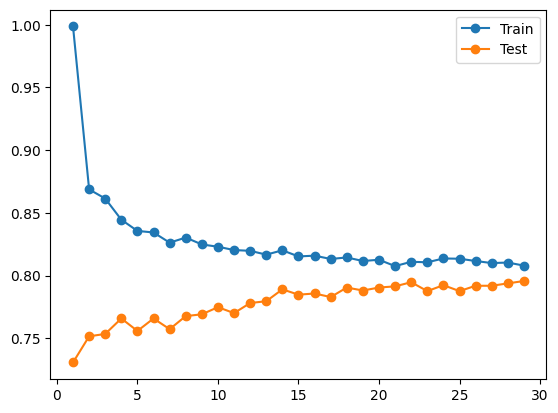

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 30)]
for i in values:
 model = KNeighborsClassifier(n_neighbors=i,weights="uniform", metric="minkowski")
 model.fit(X_train, y_train)
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 print(">%d, train: %.3f, test: %.3f" % (i, train_acc, test_acc))
 rentang = train_acc - test_acc
 print(f"Rentang adalah = {rentang:.3f}")

plt.plot(values, train_scores, "-o", label="Train")
plt.plot(values, test_scores, "-o", label="Test")
plt.legend()
plt.show()

dengan mengesampingkan nilai n_neighbors genap, kita dapat melihat bahwasannya semakin tinggi nilai n_neighbors terutama jika nilai berada pada 15 keatas, model akan semakin stabil, ini menunjjukkan bahwa semakin tinggi nilai n untuk parameter ini maka model akan semakin baik

asumsi sebelumnya adalah n_neighbors di nilai 10, jika kita lihat kembali rentang anatar train dan test nya adalah 0.023, ini menunjukan tidak adannya overfitting

# Hyper parameter tunning dengan Grid Search

Accuracy: 0.7862559241706161
Confusion Matrix:
 [[1336  213]
 [ 238  323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.78      2110



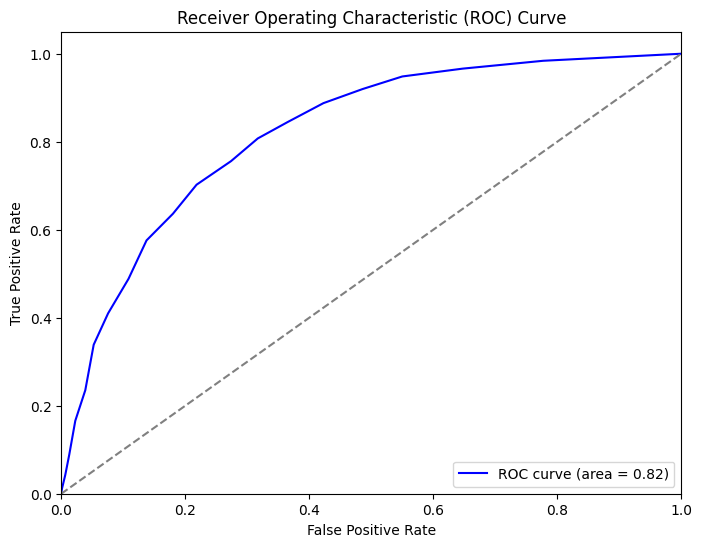

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}


In [ ]:
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("Best Parameters:", grid_search.best_params_)

dengan menggunakan hyper parameter tunning Bayesian Optimization, kita mendapatkan model terbaik berada di parameter

- metric: manhattan (default untuk metric adalah minkowski)
- n_neighbors: 21
- weights: unifor (default untuk weight adalah uniform)..berikut adalah spesfikasinya

dengan parameter terbaik kita mendapatkan nilai akurasi sebesar +-0.79, ini lebih besar sekita 1% ketimbang ketika n = 5, metric = minkowski dan weight = uniform

selain itu untuk nilai AUC, adalah sama dengan ketika n = 21, metric = manhattan dan weight = uniform yaitu menunjukkan nilai 0.82

model ini 11/12 dengan yang sebelumnya

### Cek overfitting model hasil Hyperparameter Tunning Grid search

Training Accuracy: 0.8082080455099553
Training Confusion Matrix:
 [[3191  423]
 [ 521  787]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      3614
           1       0.65      0.60      0.63      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.74      0.75      4922
weighted avg       0.80      0.81      0.81      4922

Test Accuracy: 0.7862559241706161
Test Confusion Matrix:
 [[1336  213]
 [ 238  323]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.78      2110



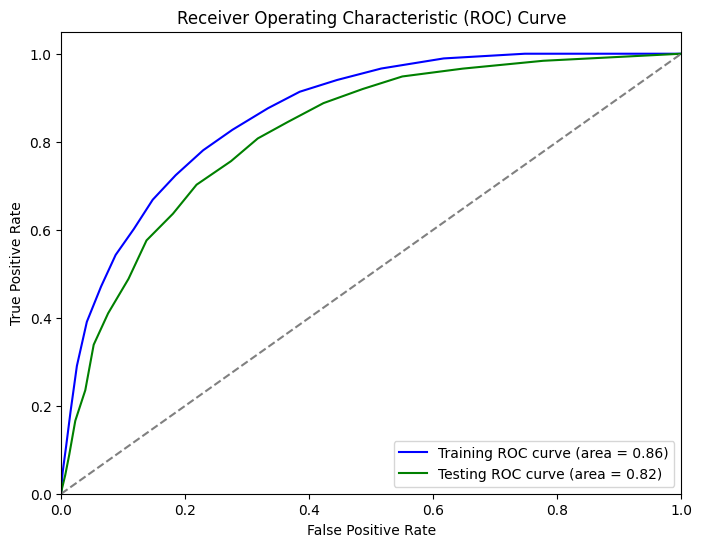

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21, weights="uniform", metric="manhattan")
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

y_train_pred_prob = knn.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred_prob)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

y_test_pred_prob = knn.predict_proba(X_test)[:, 1]
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred_prob)
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Training Classification Report:\n", train_class_report)
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color="blue", label=f"Training ROC curve (area = {train_roc_auc:.2f})")
plt.plot(test_fpr, test_tpr, color="green", label=f"Testing ROC curve (area = {test_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Training ROC Curve (area = 0.86) dan Testing ROC Curve (area = 0.82), AUC pada data training adalah 0.86, sementara AUC pada data testing adalah 0.82. Perbedaan ini sebesar 0.04 (4%), perbedaannya kecil menunjukkan ini tidak overfitting

# Hyper parameter tunning dengan Random Search

Accuracy: 0.7862559241706161
Confusion Matrix:
 [[1336  213]
 [ 238  323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.60      0.58      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.78      2110



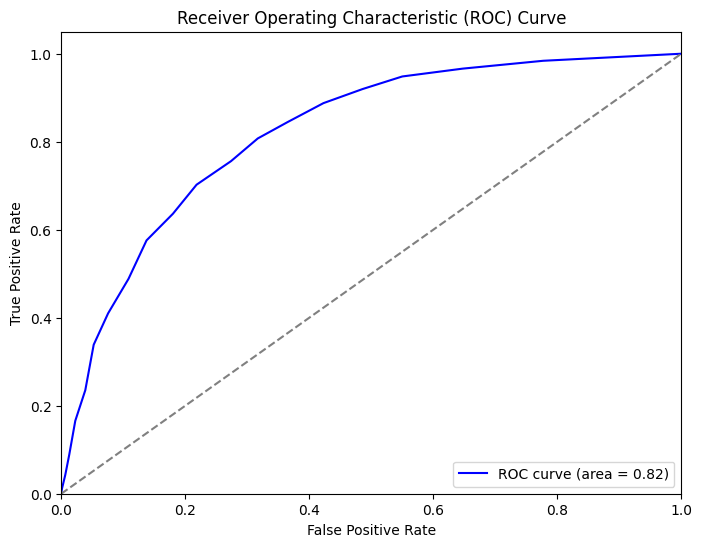

Best Parameters: {'weights': 'uniform', 'n_neighbors': 21, 'metric': 'manhattan'}


In [ ]:
knn = KNeighborsClassifier()

param_dist = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=30, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_knn = random_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

y_pred_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print("Best Parameters:", random_search.best_params_)

Dengan metode random search..parameter terbaik ditunjukkan dengan weight:uniform, n:21, dan metric: manhattan

hasil dari random search sama dengan grid search

# Kesimpulan

ketiga hasil dari hyperparameter tunning menunjukkan hasil yang 11/12, jadi nampaknya tidak ada kesalahan jika memakai antara ketigannya

tapi dikarenakan hasil terbaik dari berbagai metode hyperparameter tunning sama pada random search dan grid searh, maka kita bisa berasumsi bahwa mereka adalah yang terbaik untuk saat ini dalam model KNN, dengan spesifikasi sebagai berikut

- n_neighbors = 21
- metric: manhattan
- weights: uniform